In [1]:
import tensorflow as tf
import os
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

import sys
sys.path.append('..')

import metrics
import datasets
import networks
import utils

%matplotlib inline

## Load data

In [2]:
inp_length = 18
overlap = 8
aug = 0.5
batch_size = 256

In [3]:
train_set = datasets.seq2seq_generator('../data/yearly_{}_train.pkl'.format(inp_length + 6), overlap=overlap,
                                       batch_size=batch_size, augmentation=0.5)

test_set = datasets.seq2seq_generator('../data/yearly_{}_validation.pkl'.format(inp_length + 6), overlap=overlap,
                                      batch_size=batch_size, augmentation=0)

In [4]:
hparams = {'bottleneck_size': 700,
           'bottleneck_activation': 'relu',
           'input_seq_length': inp_length,
           'output_seq_length': overlap + 6,
           'loss_function': 'mae',
           'kernel_size': 3,
           'stride': 1}

## No Snapshot

In [15]:
def run_no_snap(i):
    
    model = networks.convolutional_ae_4_layer(hparams, ['mse', 'mae'])
    
    run_dir = '/tmp/snapshot/no_snap/' + str(i)

    callbacks = [tf.keras.callbacks.ModelCheckpoint(run_dir + '/best_weights.h5', 
                                                    save_best_only=True)]
    
    if not os.path.isdir(run_dir):
        os.makedirs(run_dir)
    
    model.fit(train_set, epochs=10, steps_per_epoch=len(train_set)//batch_size+1,
              validation_steps=len(test_set)//batch_size+1, validation_data=test_set,
              callbacks=callbacks)


for i in range(100):
    run_no_snap(i)

Train for 690 steps, validate for 230 steps
Epoch 1/10
690/690 [==============================] - 8s 12ms/step - loss: 290.4675 - mse: 25050365952.0000 - mae: 290.4675 - val_loss: 0.3725 - val_mse: 1259.2612 - val_mae: 0.3725
Epoch 2/10
690/690 [==============================] - 7s 10ms/step - loss: 0.3936 - mse: 1141.8003 - mae: 0.3936 - val_loss: 0.3694 - val_mse: 1259.2671 - val_mae: 0.3694
Epoch 3/10
690/690 [==============================] - 7s 10ms/step - loss: 0.3817 - mse: 1086.5132 - mae: 0.3817 - val_loss: 0.3726 - val_mse: 1259.2633 - val_mae: 0.3726
Epoch 4/10
690/690 [==============================] - 7s 10ms/step - loss: 290.4448 - mse: 25050363904.0000 - mae: 290.4445 - val_loss: 0.3648 - val_mse: 1259.2646 - val_mae: 0.3648
Epoch 5/10
690/690 [==============================] - 7s 10ms/step - loss: 0.3182 - mse: 930.5543 - mae: 0.3182 - val_loss: 0.3650 - val_mse: 1259.2659 - val_mae: 0.3650
Epoch 6/10
690/690 [==============================] - 7s 10ms/step - loss: 580.5

690/690 [==============================] - 8s 12ms/step - loss: 0.3551 - mse: 798.9556 - mae: 0.3551 - val_loss: 0.3770 - val_mse: 1259.2750 - val_mae: 0.3770
Epoch 2/10
690/690 [==============================] - 7s 10ms/step - loss: 387.2384 - mse: 30060435456.0000 - mae: 387.2383 - val_loss: 0.3721 - val_mse: 1259.2683 - val_mae: 0.3721
Epoch 3/10
690/690 [==============================] - 7s 10ms/step - loss: 0.3621 - mse: 994.3102 - mae: 0.3621 - val_loss: 0.3692 - val_mse: 1259.2744 - val_mae: 0.3692
Epoch 4/10
690/690 [==============================] - 7s 10ms/step - loss: 483.9001 - mse: 35070509056.0000 - mae: 483.9001 - val_loss: 0.3739 - val_mse: 1259.2655 - val_mae: 0.3739
Epoch 5/10
690/690 [==============================] - 7s 10ms/step - loss: 290.5037 - mse: 25050365952.0000 - mae: 290.5036 - val_loss: 0.3664 - val_mse: 1259.2607 - val_mae: 0.3664
Epoch 6/10
690/690 [==============================] - 7s 10ms/step - loss: 0.2773 - mse: 618.2144 - mae: 0.2773 - val_loss: 0

690/690 [==============================] - 8s 12ms/step - loss: 0.3620 - mse: 965.9871 - mae: 0.3620 - val_loss: 0.3718 - val_mse: 1259.2657 - val_mae: 0.3718
Epoch 2/10
690/690 [==============================] - 7s 10ms/step - loss: 193.7865 - mse: 20040290304.0000 - mae: 193.7865 - val_loss: 0.3668 - val_mse: 1259.2603 - val_mae: 0.3668
Epoch 3/10
690/690 [==============================] - 7s 10ms/step - loss: 387.2552 - mse: 30060435456.0000 - mae: 387.2552 - val_loss: 0.3704 - val_mse: 1259.2684 - val_mae: 0.3704
Epoch 4/10
690/690 [==============================] - 7s 10ms/step - loss: 0.3551 - mse: 938.9386 - mae: 0.3551 - val_loss: 0.3650 - val_mse: 1259.2725 - val_mae: 0.3650
Epoch 5/10
690/690 [==============================] - 7s 10ms/step - loss: 580.5730 - mse: 40080584704.0000 - mae: 580.5735 - val_loss: 0.3652 - val_mse: 1259.2620 - val_mae: 0.3652
Epoch 6/10
690/690 [==============================] - 7s 10ms/step - loss: 0.3794 - mse: 1118.0510 - mae: 0.3794 - val_loss: 

690/690 [==============================] - 8s 12ms/step - loss: 0.3866 - mse: 987.5536 - mae: 0.3866 - val_loss: 0.3684 - val_mse: 1259.2734 - val_mae: 0.3684
Epoch 2/10
690/690 [==============================] - 7s 10ms/step - loss: 580.5643 - mse: 40080580608.0000 - mae: 580.5652 - val_loss: 0.3743 - val_mse: 1259.2736 - val_mae: 0.3743
Epoch 3/10
690/690 [==============================] - 7s 10ms/step - loss: 387.1897 - mse: 30060435456.0000 - mae: 387.1897 - val_loss: 0.3646 - val_mse: 1259.2561 - val_mae: 0.3646
Epoch 4/10
690/690 [==============================] - 7s 10ms/step - loss: 0.3386 - mse: 777.1046 - mae: 0.3386 - val_loss: 0.3811 - val_mse: 1259.2681 - val_mae: 0.3811
Epoch 5/10
690/690 [==============================] - 7s 10ms/step - loss: 0.3206 - mse: 719.4739 - mae: 0.3206 - val_loss: 0.3633 - val_mse: 1259.2655 - val_mae: 0.3633
Epoch 6/10
690/690 [==============================] - 7s 10ms/step - loss: 193.7857 - mse: 20040292352.0000 - mae: 193.7856 - val_loss: 0

690/690 [==============================] - 8s 12ms/step - loss: 387.3177 - mse: 30060435456.0000 - mae: 387.3177 - val_loss: 0.3744 - val_mse: 1259.2635 - val_mae: 0.3744
Epoch 2/10
690/690 [==============================] - 7s 10ms/step - loss: 0.2159 - mse: 367.4144 - mae: 0.2159 - val_loss: 0.3665 - val_mse: 1259.2648 - val_mae: 0.3665
Epoch 3/10
690/690 [==============================] - 7s 10ms/step - loss: 0.3948 - mse: 1225.0045 - mae: 0.3948 - val_loss: 0.3734 - val_mse: 1259.2673 - val_mae: 0.3734
Epoch 4/10
690/690 [==============================] - 7s 10ms/step - loss: 580.5352 - mse: 40080584704.0000 - mae: 580.5352 - val_loss: 0.3736 - val_mse: 1259.2598 - val_mae: 0.3736
Epoch 5/10
690/690 [==============================] - 7s 10ms/step - loss: 0.3243 - mse: 736.7578 - mae: 0.3243 - val_loss: 0.3690 - val_mse: 1259.2644 - val_mae: 0.3690
Epoch 6/10
690/690 [==============================] - 7s 10ms/step - loss: 677.3404 - mse: 45090652160.0000 - mae: 677.3404 - val_loss: 

690/690 [==============================] - 8s 12ms/step - loss: 290.4682 - mse: 25050365952.0000 - mae: 290.4681 - val_loss: 0.4062 - val_mse: 1259.2871 - val_mae: 0.4062
Epoch 2/10
690/690 [==============================] - 7s 10ms/step - loss: 0.3888 - mse: 1147.6821 - mae: 0.3888 - val_loss: 0.3721 - val_mse: 1259.2679 - val_mae: 0.3721
Epoch 3/10
690/690 [==============================] - 7s 10ms/step - loss: 0.4192 - mse: 1192.3267 - mae: 0.4192 - val_loss: 0.3648 - val_mse: 1259.2638 - val_mae: 0.3648
Epoch 4/10
690/690 [==============================] - 7s 10ms/step - loss: 290.4558 - mse: 25050363904.0000 - mae: 290.4557 - val_loss: 0.3670 - val_mse: 1259.2576 - val_mae: 0.3670
Epoch 5/10
690/690 [==============================] - 7s 10ms/step - loss: 387.1254 - mse: 30060435456.0000 - mae: 387.1254 - val_loss: 0.3671 - val_mse: 1259.2549 - val_mae: 0.3671
Epoch 6/10
690/690 [==============================] - 7s 10ms/step - loss: 0.4128 - mse: 1179.8695 - mae: 0.4128 - val_loss

690/690 [==============================] - 8s 12ms/step - loss: 387.2790 - mse: 30060435456.0000 - mae: 387.2790 - val_loss: 0.3737 - val_mse: 1259.2653 - val_mae: 0.3737
Epoch 2/10
690/690 [==============================] - 7s 10ms/step - loss: 0.3564 - mse: 848.9446 - mae: 0.3564 - val_loss: 0.3719 - val_mse: 1259.2648 - val_mae: 0.3719
Epoch 3/10
690/690 [==============================] - 7s 10ms/step - loss: 0.4143 - mse: 1170.0544 - mae: 0.4143 - val_loss: 0.3781 - val_mse: 1259.2646 - val_mae: 0.3781
Epoch 4/10
690/690 [==============================] - 7s 10ms/step - loss: 387.1751 - mse: 30060439552.0000 - mae: 387.1752 - val_loss: 0.3750 - val_mse: 1259.2622 - val_mae: 0.3750
Epoch 5/10
690/690 [==============================] - 7s 10ms/step - loss: 193.6641 - mse: 20040292352.0000 - mae: 193.6640 - val_loss: 0.3667 - val_mse: 1259.2655 - val_mae: 0.3667
Epoch 6/10
690/690 [==============================] - 7s 10ms/step - loss: 0.4260 - mse: 1257.1864 - mae: 0.4260 - val_loss:

690/690 [==============================] - 8s 12ms/step - loss: 290.4785 - mse: 25050365952.0000 - mae: 290.4784 - val_loss: 0.3700 - val_mse: 1259.2670 - val_mae: 0.3700
Epoch 2/10
690/690 [==============================] - 7s 10ms/step - loss: 0.4225 - mse: 1246.8710 - mae: 0.4225 - val_loss: 0.3677 - val_mse: 1259.2687 - val_mae: 0.3677
Epoch 3/10
690/690 [==============================] - 7s 10ms/step - loss: 0.3696 - mse: 1043.2661 - mae: 0.3696 - val_loss: 0.3662 - val_mse: 1259.2594 - val_mae: 0.3662
Epoch 4/10
690/690 [==============================] - 7s 10ms/step - loss: 483.8918 - mse: 35070509056.0000 - mae: 483.8919 - val_loss: 0.3679 - val_mse: 1259.2634 - val_mae: 0.3679
Epoch 5/10
690/690 [==============================] - 7s 10ms/step - loss: 0.2967 - mse: 749.3703 - mae: 0.2967 - val_loss: 0.3635 - val_mse: 1259.2706 - val_mae: 0.3635
Epoch 6/10
690/690 [==============================] - 7s 10ms/step - loss: 580.6120 - mse: 40080580608.0000 - mae: 580.6132 - val_loss:

690/690 [==============================] - 9s 12ms/step - loss: 0.3496 - mse: 818.2049 - mae: 0.3496 - val_loss: 0.3754 - val_mse: 1259.2590 - val_mae: 0.3754
Epoch 2/10
690/690 [==============================] - 7s 10ms/step - loss: 290.4891 - mse: 25050365952.0000 - mae: 290.4892 - val_loss: 0.3883 - val_mse: 1259.2743 - val_mae: 0.3883
Epoch 3/10
690/690 [==============================] - 7s 10ms/step - loss: 0.3322 - mse: 828.8103 - mae: 0.3322 - val_loss: 0.3652 - val_mse: 1259.2559 - val_mae: 0.3652
Epoch 4/10
690/690 [==============================] - 7s 10ms/step - loss: 387.1392 - mse: 30060439552.0000 - mae: 387.1393 - val_loss: 0.3643 - val_mse: 1259.2638 - val_mae: 0.3643
Epoch 5/10
690/690 [==============================] - 7s 10ms/step - loss: 0.2653 - mse: 511.2315 - mae: 0.2653 - val_loss: 0.3670 - val_mse: 1259.2722 - val_mae: 0.3670
Epoch 6/10
690/690 [==============================] - 7s 10ms/step - loss: 483.9343 - mse: 35070509056.0000 - mae: 483.9345 - val_loss: 0

690/690 [==============================] - 8s 12ms/step - loss: 290.5239 - mse: 25050365952.0000 - mae: 290.5240 - val_loss: 0.3695 - val_mse: 1259.2710 - val_mae: 0.3695
Epoch 2/10
690/690 [==============================] - 7s 10ms/step - loss: 0.2787 - mse: 623.1164 - mae: 0.2787 - val_loss: 0.3661 - val_mse: 1259.2576 - val_mae: 0.3661
Epoch 3/10
690/690 [==============================] - 7s 10ms/step - loss: 0.2913 - mse: 550.8031 - mae: 0.2913 - val_loss: 0.3686 - val_mse: 1259.2607 - val_mae: 0.3686
Epoch 4/10
690/690 [==============================] - 7s 10ms/step - loss: 387.2135 - mse: 30060435456.0000 - mae: 387.2134 - val_loss: 0.3678 - val_mse: 1259.2665 - val_mae: 0.3678
Epoch 5/10
690/690 [==============================] - 7s 10ms/step - loss: 193.7876 - mse: 20040292352.0000 - mae: 193.7876 - val_loss: 0.3808 - val_mse: 1259.2750 - val_mae: 0.3808
Epoch 6/10
690/690 [==============================] - 7s 10ms/step - loss: 0.2838 - mse: 685.4022 - mae: 0.2838 - val_loss: 0

690/690 [==============================] - 8s 12ms/step - loss: 290.4122 - mse: 25050363904.0000 - mae: 290.4124 - val_loss: 0.3769 - val_mse: 1259.2692 - val_mae: 0.3769
Epoch 2/10
690/690 [==============================] - 7s 10ms/step - loss: 0.3809 - mse: 1037.9552 - mae: 0.3809 - val_loss: 0.3769 - val_mse: 1259.2677 - val_mae: 0.3769
Epoch 3/10
690/690 [==============================] - 7s 10ms/step - loss: 0.3034 - mse: 831.5937 - mae: 0.3034 - val_loss: 0.3717 - val_mse: 1259.2610 - val_mae: 0.3717
Epoch 4/10
690/690 [==============================] - 7s 10ms/step - loss: 483.8955 - mse: 35070517248.0000 - mae: 483.8954 - val_loss: 0.3633 - val_mse: 1259.2638 - val_mae: 0.3633
Epoch 5/10
690/690 [==============================] - 7s 10ms/step - loss: 387.1145 - mse: 30060435456.0000 - mae: 387.1144 - val_loss: 0.3637 - val_mse: 1259.2688 - val_mae: 0.3637
Epoch 6/10
690/690 [==============================] - 7s 10ms/step - loss: 0.4617 - mse: 1295.0344 - mae: 0.4617 - val_loss:

690/690 [==============================] - 8s 12ms/step - loss: 580.5478 - mse: 40080580608.0000 - mae: 580.5479 - val_loss: 0.3790 - val_mse: 1259.2682 - val_mae: 0.3790
Epoch 2/10
690/690 [==============================] - 7s 10ms/step - loss: 0.4809 - mse: 1354.5964 - mae: 0.4809 - val_loss: 0.3699 - val_mse: 1259.2672 - val_mae: 0.3699
Epoch 3/10
690/690 [==============================] - 7s 10ms/step - loss: 290.4156 - mse: 25050363904.0000 - mae: 290.4156 - val_loss: 0.3675 - val_mse: 1259.2712 - val_mae: 0.3675
Epoch 4/10
690/690 [==============================] - 7s 10ms/step - loss: 0.4109 - mse: 1203.6012 - mae: 0.4109 - val_loss: 0.3787 - val_mse: 1259.2689 - val_mae: 0.3787
Epoch 5/10
690/690 [==============================] - 7s 10ms/step - loss: 483.9492 - mse: 35070509056.0000 - mae: 483.9495 - val_loss: 0.3649 - val_mse: 1259.2655 - val_mae: 0.3649
Epoch 6/10
690/690 [==============================] - 7s 10ms/step - loss: 0.2710 - mse: 572.0036 - mae: 0.2710 - val_loss:

## Snapshot

In [75]:
def run_snapshot(snap_dir='/tmp/snapshot/snap/', num=100):
    
    for i in range(num):

        run_dir = snap_dir + '__' + str(i)

        if not os.path.isdir(run_dir):
            os.makedirs(run_dir)

        model = networks.convolutional_ae_4_layer(hparams, ['mse', 'mae'])

    callbacks = [utils.callbacks.SnapshotEnsemble(snap_dir, num, num)]

    model.fit(train_set, epochs=num, steps_per_epoch=len(train_set)//batch_size+1,
          validation_steps=len(test_set)//batch_size+1, validation_data=test_set,
          callbacks=callbacks)

## Evaluation

In [33]:
no_snap_model_dirs = ['/tmp/snapshot/no_snap/{}/best_weights.h5'.format(i) for i in range(100)]
snap_model_dirs = ['/tmp/snapshot/snap/__{}/best_weights.h5'.format(i) for i in range(100)]

In [5]:
train_path = '../data/Yearly-train.csv'
test_path = '../data/Yearly-test.csv'

train = pd.read_csv(train_path).drop('V1', axis=1)
test = pd.read_csv(test_path).drop('V1', axis=1)

In [6]:
np.seterr(all='ignore')

def get_last_N(series, N=18):
    ser_N = series.dropna().iloc[-N:].values
    if len(ser_N) < N:
        pad = [ser_N[0]] * (N - len(ser_N))
        ser_N = np.r_[pad, ser_N]
    return ser_N

In [7]:
X_test = np.array([get_last_N(ser[1], N=18) for ser in train.iterrows()])
y_test = test.values

In [8]:
def get_predictions(model, data):
        
    x = data[..., np.newaxis]
    
    mn, mx = x.min(axis=1), x.max(axis=1)
    x_sc = (x[..., 0] - mn) / (mx - mn)

    pred = model(x_sc[..., np.newaxis])

    return pred[..., 0] * (mx - mn) + mn

In [9]:
def ensemble_preds(model_family, data):

    preds = []
    
    for model_dir in tqdm(model_family):

        model = tf.keras.models.load_model(model_dir)
        preds.append(get_predictions(model, data))

        tf.keras.backend.clear_session()

    return np.stack(preds)

In [10]:
def evaluate_single(preds, y_test):
    return np.nanmean(metrics.SMAPE(y_test, preds[:, -6:]))

def evaluate_ensemble(preds, y_test):
    ensemble_preds = np.median(preds, axis=0)[:, -6:]
    return np.nanmean(metrics.SMAPE(y_test, ensemble_preds))

In [60]:
preds_no = ensemble_preds(no_snap_model_dirs, X_test)
preds_snap = ensemble_preds(snap_model_dirs, X_test)

100%|██████████| 100/100 [00:58<00:00,  1.71it/s]


In [61]:
preds_no.shape

(100, 23000, 14)

In [62]:
preds_snap.shape

(100, 23000, 14)

In [63]:
single_no = [evaluate_single(p, y_test) for p in preds_no]
single_snap = [evaluate_single(p, y_test) for p in preds_snap]

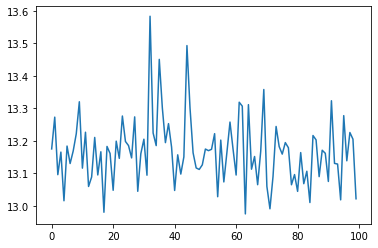

In [64]:
plt.plot(single_no)

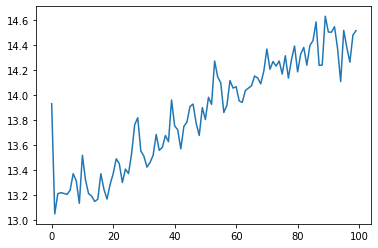

In [65]:
plt.plot(single_snap)

In [67]:
add_no_snap = [evaluate_ensemble(preds_no[:i+1], y_test) for i in range(100)]
add_snap = [evaluate_ensemble(preds_snap[:i+1], y_test) for i in range(100)]

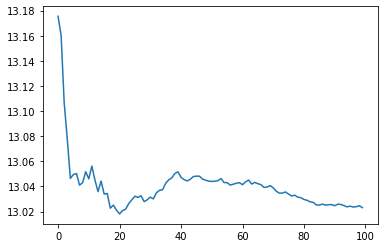

In [69]:
plt.plot(add_no_snap)

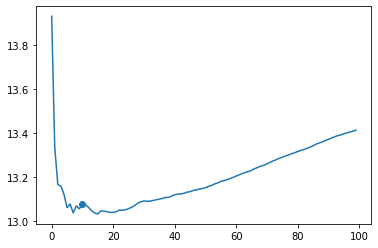

In [73]:
plt.plot(add_snap)
plt.scatter([10], add_snap[10])

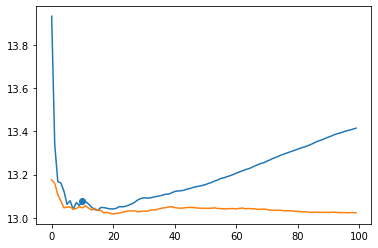

In [74]:
plt.plot(add_snap)
plt.scatter([10], add_snap[10])
plt.plot(add_no_snap)

## More snapshots

In [78]:
snap_dirs = ['/tmp/snapshot/snap_{}'.format(i) for i in range(30)]

for snap_dir in snap_dirs:
    run_snapshot(snap_dir, num=30)

Train for 690 steps, validate for 230 steps
Epoch 1/30
690/690 [==============================] - 9s 13ms/step - loss: 580.5489 - mse: 40080580608.0000 - mae: 580.5491 - val_loss: 0.3691 - val_mse: 1259.2681 - val_mae: 0.3691
Epoch 2/30
690/690 [==============================] - 8s 12ms/step - loss: 0.4198 - mse: 1270.0308 - mae: 0.4198 - val_loss: 0.3791 - val_mse: 1259.2639 - val_mae: 0.3791
Epoch 3/30
690/690 [==============================] - 8s 11ms/step - loss: 580.5428 - mse: 40080580608.0000 - mae: 580.5435 - val_loss: 0.3655 - val_mse: 1259.2637 - val_mae: 0.3655
Epoch 4/30
690/690 [==============================] - 8s 11ms/step - loss: 0.4424 - mse: 1395.3506 - mae: 0.4423 - val_loss: 0.3668 - val_mse: 1259.2661 - val_mae: 0.3668
Epoch 5/30
690/690 [==============================] - 8s 11ms/step - loss: 387.0805 - mse: 30060435456.0000 - mae: 387.0806 - val_loss: 0.3644 - val_mse: 1259.2584 - val_mae: 0.3644
Epoch 6/30
690/690 [==============================] - 8s 11ms/step -

Epoch 17/30
690/690 [==============================] - 8s 11ms/step - loss: 290.4883 - mse: 25050365952.0000 - mae: 290.4885 - val_loss: 0.3619 - val_mse: 1259.2614 - val_mae: 0.3619
Epoch 18/30
690/690 [==============================] - 8s 11ms/step - loss: 0.3315 - mse: 821.8398 - mae: 0.3315 - val_loss: 0.3608 - val_mse: 1259.2617 - val_mae: 0.3608
Epoch 19/30
690/690 [==============================] - 8s 11ms/step - loss: 0.3935 - mse: 1190.4991 - mae: 0.3935 - val_loss: 0.3598 - val_mse: 1259.2578 - val_mae: 0.3598
Epoch 20/30
690/690 [==============================] - 8s 11ms/step - loss: 290.3977 - mse: 25050365952.0000 - mae: 290.3977 - val_loss: 0.3619 - val_mse: 1259.2578 - val_mae: 0.3619
Epoch 21/30
690/690 [==============================] - 8s 11ms/step - loss: 0.3711 - mse: 1157.4955 - mae: 0.3711 - val_loss: 0.3652 - val_mse: 1259.2463 - val_mae: 0.3652
Epoch 22/30
690/690 [==============================] - 8s 11ms/step - loss: 290.4702 - mse: 25050365952.0000 - mae: 290

Epoch 3/30
690/690 [==============================] - 8s 12ms/step - loss: 0.3190 - mse: 874.7178 - mae: 0.3190 - val_loss: 0.3656 - val_mse: 1259.2657 - val_mae: 0.3656
Epoch 4/30
690/690 [==============================] - 8s 11ms/step - loss: 290.4864 - mse: 25050365952.0000 - mae: 290.4866 - val_loss: 0.3764 - val_mse: 1259.2648 - val_mae: 0.3764
Epoch 5/30
690/690 [==============================] - 8s 12ms/step - loss: 290.4330 - mse: 25050363904.0000 - mae: 290.4326 - val_loss: 0.3648 - val_mse: 1259.2601 - val_mae: 0.3648
Epoch 6/30
690/690 [==============================] - 8s 12ms/step - loss: 0.3809 - mse: 1183.3646 - mae: 0.3809 - val_loss: 0.3663 - val_mse: 1259.2607 - val_mae: 0.3663
Epoch 7/30
690/690 [==============================] - 8s 11ms/step - loss: 580.6014 - mse: 40080580608.0000 - mae: 580.6014 - val_loss: 0.3619 - val_mse: 1259.2676 - val_mae: 0.3619
Epoch 8/30
690/690 [==============================] - 8s 11ms/step - loss: 0.3614 - mse: 1097.0166 - mae: 0.3614 

690/690 [==============================] - 8s 11ms/step - loss: 0.3175 - mse: 798.2923 - mae: 0.3175 - val_loss: 0.3609 - val_mse: 1259.2623 - val_mae: 0.3609
Epoch 20/30
690/690 [==============================] - 8s 11ms/step - loss: 483.8750 - mse: 35070509056.0000 - mae: 483.8754 - val_loss: 0.3604 - val_mse: 1259.2614 - val_mae: 0.3604
Epoch 21/30
690/690 [==============================] - 8s 11ms/step - loss: 290.5956 - mse: 25050363904.0000 - mae: 290.5958 - val_loss: 0.3604 - val_mse: 1259.2650 - val_mae: 0.3604
Epoch 22/30
690/690 [==============================] - 8s 11ms/step - loss: 0.2446 - mse: 438.5642 - mae: 0.2446 - val_loss: 0.3617 - val_mse: 1259.2744 - val_mae: 0.3617
Epoch 23/30
690/690 [==============================] - 8s 11ms/step - loss: 483.8045 - mse: 35070509056.0000 - mae: 483.8045 - val_loss: 0.3600 - val_mse: 1259.2607 - val_mae: 0.3600
Epoch 24/30
690/690 [==============================] - 8s 11ms/step - loss: 0.4100 - mse: 1249.4619 - mae: 0.4100 - val_l

Epoch 5/30
690/690 [==============================] - 8s 11ms/step - loss: 0.4222 - mse: 1181.1534 - mae: 0.4222 - val_loss: 0.3654 - val_mse: 1259.2673 - val_mae: 0.3654
Epoch 6/30
690/690 [==============================] - 8s 11ms/step - loss: 193.7518 - mse: 20040290304.0000 - mae: 193.7518 - val_loss: 0.3694 - val_mse: 1259.2661 - val_mae: 0.3694
Epoch 7/30
690/690 [==============================] - 8s 11ms/step - loss: 0.3382 - mse: 910.7788 - mae: 0.3382 - val_loss: 0.3651 - val_mse: 1259.2612 - val_mae: 0.3651
Epoch 8/30
690/690 [==============================] - 8s 11ms/step - loss: 483.8758 - mse: 35070509056.0000 - mae: 483.8758 - val_loss: 0.3682 - val_mse: 1259.2598 - val_mae: 0.3682
Epoch 9/30
690/690 [==============================] - 8s 11ms/step - loss: 290.3791 - mse: 25050363904.0000 - mae: 290.3790 - val_loss: 0.3640 - val_mse: 1259.2676 - val_mae: 0.3640
Epoch 10/30
690/690 [==============================] - 8s 11ms/step - loss: 0.3980 - mse: 1270.8134 - mae: 0.3980

690/690 [==============================] - 7s 11ms/step - loss: 580.5318 - mse: 40080580608.0000 - mae: 580.5318 - val_loss: 0.3605 - val_mse: 1259.2712 - val_mae: 0.3605
Epoch 22/30
690/690 [==============================] - 8s 11ms/step - loss: 0.4243 - mse: 1278.9781 - mae: 0.4243 - val_loss: 0.3661 - val_mse: 1259.2552 - val_mae: 0.3661
Epoch 23/30
690/690 [==============================] - 8s 11ms/step - loss: 0.3946 - mse: 1169.5483 - mae: 0.3946 - val_loss: 0.3615 - val_mse: 1259.2639 - val_mae: 0.3615
Epoch 24/30
690/690 [==============================] - 8s 11ms/step - loss: 290.4501 - mse: 25050363904.0000 - mae: 290.4501 - val_loss: 0.3627 - val_mse: 1259.2603 - val_mae: 0.3627
Epoch 25/30
690/690 [==============================] - 7s 11ms/step - loss: 0.3451 - mse: 850.8871 - mae: 0.3451 - val_loss: 0.3614 - val_mse: 1259.2681 - val_mae: 0.3614
Epoch 26/30
690/690 [==============================] - 7s 11ms/step - loss: 483.9069 - mse: 35070509056.0000 - mae: 483.9071 - val_

Epoch 7/30
690/690 [==============================] - 8s 11ms/step - loss: 0.4331 - mse: 1306.9413 - mae: 0.4331 - val_loss: 0.3624 - val_mse: 1259.2656 - val_mae: 0.3624
Epoch 8/30
690/690 [==============================] - 8s 11ms/step - loss: 387.1106 - mse: 30060439552.0000 - mae: 387.1104 - val_loss: 0.3668 - val_mse: 1259.2646 - val_mae: 0.3668
Epoch 9/30
690/690 [==============================] - 7s 11ms/step - loss: 387.1698 - mse: 30060439552.0000 - mae: 387.1698 - val_loss: 0.3617 - val_mse: 1259.2616 - val_mae: 0.3617
Epoch 10/30
690/690 [==============================] - 7s 11ms/step - loss: 0.3367 - mse: 973.2290 - mae: 0.3367 - val_loss: 0.3643 - val_mse: 1259.2654 - val_mae: 0.3643
Epoch 11/30
690/690 [==============================] - 7s 11ms/step - loss: 387.0878 - mse: 30060435456.0000 - mae: 387.0878 - val_loss: 0.3684 - val_mse: 1259.2605 - val_mae: 0.3684
Epoch 12/30
690/690 [==============================] - 8s 11ms/step - loss: 0.4687 - mse: 1488.7454 - mae: 0.46

690/690 [==============================] - 8s 11ms/step - loss: 0.3729 - mse: 1044.1765 - mae: 0.3729 - val_loss: 0.3643 - val_mse: 1259.2639 - val_mae: 0.3643
Epoch 24/30
690/690 [==============================] - 8s 11ms/step - loss: 483.9036 - mse: 35070513152.0000 - mae: 483.9040 - val_loss: 0.3622 - val_mse: 1259.2633 - val_mae: 0.3622
Epoch 25/30
690/690 [==============================] - 8s 11ms/step - loss: 483.8832 - mse: 35070509056.0000 - mae: 483.8839 - val_loss: 0.3597 - val_mse: 1259.2681 - val_mae: 0.3597
Epoch 26/30
690/690 [==============================] - 8s 11ms/step - loss: 0.2986 - mse: 755.2435 - mae: 0.2986 - val_loss: 0.3608 - val_mse: 1259.2539 - val_mae: 0.3608
Epoch 27/30
690/690 [==============================] - 8s 11ms/step - loss: 290.4629 - mse: 25050365952.0000 - mae: 290.4629 - val_loss: 0.3629 - val_mse: 1259.2603 - val_mae: 0.3629
Epoch 28/30
690/690 [==============================] - 8s 11ms/step - loss: 0.3833 - mse: 1125.4956 - mae: 0.3833 - val_

Epoch 9/30
690/690 [==============================] - 8s 11ms/step - loss: 0.3129 - mse: 795.6802 - mae: 0.3129 - val_loss: 0.3691 - val_mse: 1259.2640 - val_mae: 0.3691
Epoch 10/30
690/690 [==============================] - 8s 11ms/step - loss: 387.1499 - mse: 30060435456.0000 - mae: 387.1505 - val_loss: 0.3646 - val_mse: 1259.2676 - val_mae: 0.3646
Epoch 11/30
690/690 [==============================] - 8s 11ms/step - loss: 677.2588 - mse: 45090652160.0000 - mae: 677.2592 - val_loss: 0.3665 - val_mse: 1259.2556 - val_mae: 0.3665
Epoch 12/30
690/690 [==============================] - 8s 11ms/step - loss: 0.4135 - mse: 1198.3979 - mae: 0.4135 - val_loss: 0.3742 - val_mse: 1259.2686 - val_mae: 0.3742
Epoch 13/30
690/690 [==============================] - 8s 11ms/step - loss: 0.3353 - mse: 862.9945 - mae: 0.3353 - val_loss: 0.3617 - val_mse: 1259.2607 - val_mae: 0.3617
Epoch 14/30
690/690 [==============================] - 8s 11ms/step - loss: 580.5790 - mse: 40080580608.0000 - mae: 580.5

690/690 [==============================] - 8s 11ms/step - loss: 580.5496 - mse: 40080580608.0000 - mae: 580.5496 - val_loss: 0.3613 - val_mse: 1259.2618 - val_mae: 0.3613
Epoch 26/30
690/690 [==============================] - 8s 11ms/step - loss: 0.3570 - mse: 1036.8732 - mae: 0.3570 - val_loss: 0.3611 - val_mse: 1259.2540 - val_mae: 0.3611
Epoch 27/30
690/690 [==============================] - 8s 11ms/step - loss: 0.2920 - mse: 654.0816 - mae: 0.2920 - val_loss: 0.3624 - val_mse: 1259.2510 - val_mae: 0.3624
Epoch 28/30
690/690 [==============================] - 8s 11ms/step - loss: 290.5337 - mse: 25050365952.0000 - mae: 290.5337 - val_loss: 0.3642 - val_mse: 1259.2676 - val_mae: 0.3642
Epoch 29/30
690/690 [==============================] - 8s 11ms/step - loss: 0.3383 - mse: 966.4819 - mae: 0.3383 - val_loss: 0.3608 - val_mse: 1259.2587 - val_mae: 0.3608
Epoch 30/30
690/690 [==============================] - 8s 11ms/step - loss: 387.1942 - mse: 30060435456.0000 - mae: 387.1942 - val_l

Epoch 11/30
690/690 [==============================] - 8s 11ms/step - loss: 387.2673 - mse: 30060435456.0000 - mae: 387.2673 - val_loss: 0.3666 - val_mse: 1259.2729 - val_mae: 0.3666
Epoch 12/30
690/690 [==============================] - 8s 11ms/step - loss: 0.2803 - mse: 606.8764 - mae: 0.2803 - val_loss: 0.3623 - val_mse: 1259.2589 - val_mae: 0.3623
Epoch 13/30
690/690 [==============================] - 8s 11ms/step - loss: 387.1922 - mse: 30060435456.0000 - mae: 387.1923 - val_loss: 0.3625 - val_mse: 1259.2599 - val_mae: 0.3625
Epoch 14/30
690/690 [==============================] - 8s 11ms/step - loss: 0.3623 - mse: 963.3416 - mae: 0.3623 - val_loss: 0.3619 - val_mse: 1259.2678 - val_mae: 0.3619
Epoch 15/30
690/690 [==============================] - 8s 11ms/step - loss: 483.8384 - mse: 35070509056.0000 - mae: 483.8386 - val_loss: 0.3612 - val_mse: 1259.2495 - val_mae: 0.3612
Epoch 16/30
690/690 [==============================] - 8s 11ms/step - loss: 0.3722 - mse: 1103.0594 - mae: 0.

690/690 [==============================] - 8s 11ms/step - loss: 290.4287 - mse: 25050365952.0000 - mae: 290.4288 - val_loss: 0.3597 - val_mse: 1259.2583 - val_mae: 0.3597
Epoch 28/30
690/690 [==============================] - 8s 11ms/step - loss: 0.4354 - mse: 1250.9486 - mae: 0.4354 - val_loss: 0.3605 - val_mse: 1259.2554 - val_mae: 0.3605
Epoch 29/30
690/690 [==============================] - 8s 11ms/step - loss: 0.3127 - mse: 783.5004 - mae: 0.3127 - val_loss: 0.3595 - val_mse: 1259.2542 - val_mae: 0.3595
Epoch 30/30
690/690 [==============================] - 8s 11ms/step - loss: 387.1423 - mse: 30060435456.0000 - mae: 387.1423 - val_loss: 0.3600 - val_mse: 1259.2587 - val_mae: 0.3600
Train for 690 steps, validate for 230 steps
Epoch 1/30
690/690 [==============================] - 9s 13ms/step - loss: 193.8839 - mse: 20040294400.0000 - mae: 193.8839 - val_loss: 0.3678 - val_mse: 1259.2936 - val_mae: 0.3678
Epoch 2/30
690/690 [==============================] - 8s 12ms/step - loss: 0.

Epoch 13/30
690/690 [==============================] - 7s 11ms/step - loss: 0.3868 - mse: 917.3211 - mae: 0.3868 - val_loss: 0.3642 - val_mse: 1259.2563 - val_mae: 0.3642
Epoch 14/30
690/690 [==============================] - 8s 11ms/step - loss: 193.7509 - mse: 20040290304.0000 - mae: 193.7509 - val_loss: 0.3612 - val_mse: 1259.2605 - val_mae: 0.3612
Epoch 15/30
690/690 [==============================] - 8s 11ms/step - loss: 387.1623 - mse: 30060435456.0000 - mae: 387.1623 - val_loss: 0.3676 - val_mse: 1259.2600 - val_mae: 0.3676
Epoch 16/30
690/690 [==============================] - 8s 11ms/step - loss: 0.3069 - mse: 794.7369 - mae: 0.3069 - val_loss: 0.3726 - val_mse: 1259.2650 - val_mae: 0.3726
Epoch 17/30
690/690 [==============================] - 8s 11ms/step - loss: 0.3334 - mse: 830.5289 - mae: 0.3334 - val_loss: 0.3633 - val_mse: 1259.2595 - val_mae: 0.3633
Epoch 18/30
690/690 [==============================] - 8s 11ms/step - loss: 387.1627 - mse: 30060435456.0000 - mae: 387.1

690/690 [==============================] - 8s 11ms/step - loss: 0.3323 - mse: 1062.3602 - mae: 0.3323 - val_loss: 0.3600 - val_mse: 1259.2570 - val_mae: 0.3600
Epoch 30/30
690/690 [==============================] - 8s 11ms/step - loss: 290.4553 - mse: 25050363904.0000 - mae: 290.4553 - val_loss: 0.3629 - val_mse: 1259.2556 - val_mae: 0.3629
Train for 690 steps, validate for 230 steps
Epoch 1/30
690/690 [==============================] - 9s 13ms/step - loss: 0.4410 - mse: 1229.9906 - mae: 0.4410 - val_loss: 0.3785 - val_mse: 1259.2628 - val_mae: 0.3785
Epoch 2/30
690/690 [==============================] - 8s 11ms/step - loss: 290.4014 - mse: 25050363904.0000 - mae: 290.4013 - val_loss: 0.3673 - val_mse: 1259.2605 - val_mae: 0.3673
Epoch 3/30
690/690 [==============================] - 8s 11ms/step - loss: 0.3118 - mse: 864.0360 - mae: 0.3118 - val_loss: 0.3689 - val_mse: 1259.2582 - val_mae: 0.3689
Epoch 4/30
690/690 [==============================] - 8s 11ms/step - loss: 193.7622 - mse:

Epoch 15/30
690/690 [==============================] - 8s 11ms/step - loss: 0.3124 - mse: 768.7750 - mae: 0.3124 - val_loss: 0.3606 - val_mse: 1259.2646 - val_mae: 0.3606
Epoch 16/30
690/690 [==============================] - 8s 11ms/step - loss: 387.2164 - mse: 30060439552.0000 - mae: 387.2162 - val_loss: 0.3638 - val_mse: 1259.2710 - val_mae: 0.3638
Epoch 17/30
690/690 [==============================] - 8s 11ms/step - loss: 0.2942 - mse: 700.9583 - mae: 0.2942 - val_loss: 0.3683 - val_mse: 1259.2698 - val_mae: 0.3683
Epoch 18/30
690/690 [==============================] - 8s 11ms/step - loss: 193.7970 - mse: 20040292352.0000 - mae: 193.7969 - val_loss: 0.3602 - val_mse: 1259.2644 - val_mae: 0.3602
Epoch 19/30
690/690 [==============================] - 8s 11ms/step - loss: 387.3353 - mse: 30060435456.0000 - mae: 387.3352 - val_loss: 0.3604 - val_mse: 1259.2532 - val_mae: 0.3604
Epoch 20/30
690/690 [==============================] - 8s 11ms/step - loss: 0.2159 - mse: 439.0816 - mae: 0.2

690/690 [==============================] - 9s 13ms/step - loss: 0.4966 - mse: 1429.7765 - mae: 0.4966 - val_loss: 0.3875 - val_mse: 1259.2698 - val_mae: 0.3875
Epoch 2/30
690/690 [==============================] - 8s 11ms/step - loss: 290.3812 - mse: 25050363904.0000 - mae: 290.3815 - val_loss: 0.3678 - val_mse: 1259.2678 - val_mae: 0.3678
Epoch 3/30
690/690 [==============================] - 8s 11ms/step - loss: 290.3978 - mse: 25050363904.0000 - mae: 290.3976 - val_loss: 0.3660 - val_mse: 1259.2693 - val_mae: 0.3660
Epoch 4/30
690/690 [==============================] - 8s 11ms/step - loss: 0.4703 - mse: 1426.9281 - mae: 0.4703 - val_loss: 0.3708 - val_mse: 1259.2642 - val_mae: 0.3708
Epoch 5/30
690/690 [==============================] - 8s 11ms/step - loss: 0.2670 - mse: 429.4161 - mae: 0.2670 - val_loss: 0.3698 - val_mse: 1259.2681 - val_mae: 0.3698
Epoch 6/30
690/690 [==============================] - 7s 11ms/step - loss: 387.2684 - mse: 30060445696.0000 - mae: 387.2683 - val_loss:

Epoch 3/30
690/690 [==============================] - 8s 11ms/step - loss: 290.4214 - mse: 25050365952.0000 - mae: 290.4218 - val_loss: 0.3660 - val_mse: 1259.2727 - val_mae: 0.3660
Epoch 4/30
690/690 [==============================] - 8s 11ms/step - loss: 0.3979 - mse: 1178.2612 - mae: 0.3979 - val_loss: 0.3668 - val_mse: 1259.2642 - val_mae: 0.3668
Epoch 5/30
690/690 [==============================] - 8s 12ms/step - loss: 387.1945 - mse: 30060439552.0000 - mae: 387.1946 - val_loss: 0.3642 - val_mse: 1259.2653 - val_mae: 0.3642
Epoch 6/30
690/690 [==============================] - 8s 11ms/step - loss: 0.3482 - mse: 1002.4147 - mae: 0.3482 - val_loss: 0.3668 - val_mse: 1259.2667 - val_mae: 0.3668
Epoch 7/30
690/690 [==============================] - 7s 11ms/step - loss: 483.9221 - mse: 35070509056.0000 - mae: 483.9230 - val_loss: 0.3636 - val_mse: 1259.2533 - val_mae: 0.3636
Epoch 8/30
690/690 [==============================] - 8s 11ms/step - loss: 0.2630 - mse: 612.3834 - mae: 0.2630 

690/690 [==============================] - 8s 11ms/step - loss: 193.7750 - mse: 20040292352.0000 - mae: 193.7749 - val_loss: 0.3638 - val_mse: 1259.2507 - val_mae: 0.3638
Epoch 20/30
690/690 [==============================] - 8s 11ms/step - loss: 0.3679 - mse: 1086.8135 - mae: 0.3679 - val_loss: 0.3666 - val_mse: 1259.2653 - val_mae: 0.3666
Epoch 21/30
690/690 [==============================] - 8s 11ms/step - loss: 0.2881 - mse: 664.0914 - mae: 0.2881 - val_loss: 0.3643 - val_mse: 1259.2605 - val_mae: 0.3643
Epoch 22/30
690/690 [==============================] - 8s 11ms/step - loss: 290.5196 - mse: 25050365952.0000 - mae: 290.5198 - val_loss: 0.3620 - val_mse: 1259.2595 - val_mae: 0.3620
Epoch 23/30
690/690 [==============================] - 8s 11ms/step - loss: 483.8585 - mse: 35070509056.0000 - mae: 483.8591 - val_loss: 0.3599 - val_mse: 1259.2656 - val_mae: 0.3599
Epoch 24/30
690/690 [==============================] - 8s 11ms/step - loss: 0.4338 - mse: 1456.4835 - mae: 0.4338 - val_

Epoch 5/30
690/690 [==============================] - 8s 11ms/step - loss: 290.4288 - mse: 25050363904.0000 - mae: 290.4287 - val_loss: 0.3664 - val_mse: 1259.2556 - val_mae: 0.3664
Epoch 6/30
690/690 [==============================] - 8s 11ms/step - loss: 0.3878 - mse: 1031.6949 - mae: 0.3878 - val_loss: 0.3732 - val_mse: 1259.2544 - val_mae: 0.3732
Epoch 7/30
690/690 [==============================] - 8s 11ms/step - loss: 387.1284 - mse: 30060439552.0000 - mae: 387.1285 - val_loss: 0.3659 - val_mse: 1259.2745 - val_mae: 0.3659
Epoch 8/30
690/690 [==============================] - 8s 11ms/step - loss: 0.4126 - mse: 1227.6304 - mae: 0.4126 - val_loss: 0.3630 - val_mse: 1259.2769 - val_mae: 0.3630
Epoch 9/30
690/690 [==============================] - 8s 11ms/step - loss: 0.3480 - mse: 767.9404 - mae: 0.3480 - val_loss: 0.3653 - val_mse: 1259.2648 - val_mae: 0.3653
Epoch 10/30
690/690 [==============================] - 8s 11ms/step - loss: 290.5305 - mse: 25050365952.0000 - mae: 290.5304

In [84]:
model_dirs = [[d + '__{}/best_weights.h5'.format(i) for i in range(30)] for d in snap_dirs]

In [85]:
len(model_dirs)

30

In [86]:
len(model_dirs[0])

30

In [87]:
results = []

for i in range(30):
    snap_model_dirs = model_dirs[i]
    
    preds_snap = ensemble_preds(snap_model_dirs, X_test)

    add_snap = [evaluate_ensemble(preds_snap[:j+1], y_test) for j in range(30)]
    
    results.append(add_snap)

100%|██████████| 30/30 [00:18<00:00,  1.63it/s]


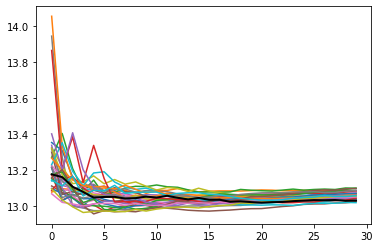

In [107]:
for r in results:
    plt.plot(r)

    
plt.plot(add_no_snap[:30], c='black', lw=2)

In [97]:
results_tuned = []

for i in range(30):
    snap_model_dirs = model_dirs[i]
    
    preds_snap = ensemble_preds(snap_model_dirs, X_test)
  
    results_tuned.append(evaluate_ensemble(preds_snap[2:10], y_test))

100%|██████████| 30/30 [00:18<00:00,  1.65it/s]


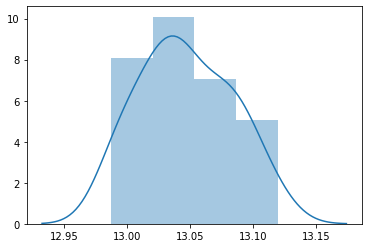

In [99]:
sns.distplot(results_tuned)

In [101]:
np.array(results).min()

12.955389942546097

In [116]:
preds_snap_1 = ensemble_preds(model_dirs[0][2:10], X_test)
preds_snap_2 = ensemble_preds(model_dirs[1][2:10], X_test)

preds_snap = np.r_[preds_snap_1, preds_snap_2]

r = evaluate_ensemble(preds_snap, y_test)

100%|██████████| 8/8 [00:04<00:00,  1.71it/s]


In [117]:
r

13.059560070586063

In [120]:
i1 = np.random.choice(30, size=100)
i2 = np.random.choice(30, size=100)

results_multi = []

for i in range(100):
    preds_snap_1 = ensemble_preds(model_dirs[i1[i]][2:10], X_test)
    preds_snap_2 = ensemble_preds(model_dirs[i2[i]][2:10], X_test)

    preds_snap = np.r_[preds_snap_1, preds_snap_2]

    results_multi.append(evaluate_ensemble(preds_snap, y_test))

100%|██████████| 8/8 [00:06<00:00,  1.21it/s]


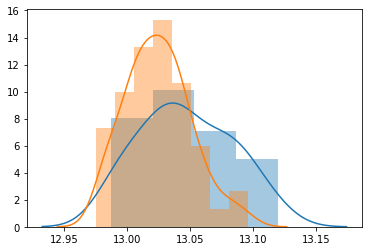

In [126]:
sns.distplot(results_tuned)

sns.distplot(results_multi)

In [127]:
i1 = np.random.choice(30, size=100)
i2 = np.random.choice(30, size=100)
i3 = np.random.choice(30, size=100)
i4 = np.random.choice(30, size=100)
i5 = np.random.choice(30, size=100)

results_multi_3 = []
results_multi_4 = []
results_multi_5 = []

for i in range(100):
    preds_snap_1 = ensemble_preds(model_dirs[i1[i]][2:10], X_test)
    preds_snap_2 = ensemble_preds(model_dirs[i2[i]][2:10], X_test)
    preds_snap_3 = ensemble_preds(model_dirs[i3[i]][2:10], X_test)
    preds_snap_4 = ensemble_preds(model_dirs[i4[i]][2:10], X_test)
    preds_snap_5 = ensemble_preds(model_dirs[i5[i]][2:10], X_test)

    preds_snap = np.r_[preds_snap_1, preds_snap_2, preds_snap_3]
    results_multi_3.append(evaluate_ensemble(preds_snap, y_test))

    preds_snap = np.r_[preds_snap, preds_snap_4]
    results_multi_4.append(evaluate_ensemble(preds_snap, y_test))

    preds_snap = np.r_[preds_snap, preds_snap_5]
    results_multi_5.append(evaluate_ensemble(preds_snap, y_test))


100%|██████████| 8/8 [00:04<00:00,  1.87it/s]


100%|██████████| 8/8 [00:06<00:00,  1.25it/s]


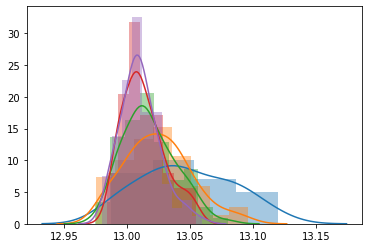

In [129]:
sns.distplot(results_tuned)
sns.distplot(results_multi)
sns.distplot(results_multi_3)
sns.distplot(results_multi_4)
sns.distplot(results_multi_5)

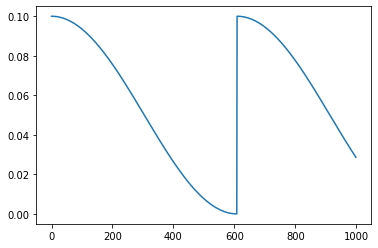

In [27]:
a = [cosine_annealing(e) for e in range(1000)]

plt.plot(a)

# Fixed snapshot

In [11]:
def run_snapshot(snap_dir='/tmp/snapshot/snap/', num=100):
    
    for i in range(num):

        run_dir = snap_dir + '__' + str(i)

        if not os.path.isdir(run_dir):
            os.makedirs(run_dir)

        model = networks.convolutional_ae_4_layer(hparams, ['mse', 'mae'])

    callbacks = [utils.callbacks.SnapshotEnsemble(snap_dir, len(train_set)//batch_size+1,
                                                  n_cycles=num, max_epochs=num+5)]

    model.fit(train_set, epochs=num+5, steps_per_epoch=len(train_set)//batch_size+1,
          validation_steps=len(test_set)//batch_size+1, validation_data=test_set,
          callbacks=callbacks)

In [12]:
snap_dirs = ['/tmp/snapshot/snap_fixed_{}/'.format(i) for i in range(10)]

for snap_dir in snap_dirs:
    run_snapshot(snap_dir, num=100)

Train for 690 steps, validate for 230 steps
Epoch 1/105
690/690 [==============================] - 10s 14ms/step - loss: 290.4991 - mse: 25050365952.0000 - mae: 290.4992 - val_loss: 0.3689 - val_mse: 1259.2704 - val_mae: 0.3689
Epoch 2/105
690/690 [==============================] - 7s 10ms/step - loss: 0.3285 - mse: 779.8119 - mae: 0.3285 - val_loss: 0.3616 - val_mse: 1259.2638 - val_mae: 0.3616
Epoch 3/105
690/690 [==============================] - 7s 10ms/step - loss: 0.3612 - mse: 985.9623 - mae: 0.3612 - val_loss: 0.3608 - val_mse: 1259.2644 - val_mae: 0.3608
Epoch 4/105
690/690 [==============================] - 7s 10ms/step - loss: 290.4886 - mse: 25050363904.0000 - mae: 290.4887 - val_loss: 0.3605 - val_mse: 1259.2646 - val_mae: 0.3605
Epoch 5/105
690/690 [==============================] - 7s 10ms/step - loss: 0.3417 - mse: 943.7161 - mae: 0.3417 - val_loss: 0.3602 - val_mse: 1259.2661 - val_mae: 0.3602
Epoch 6/105
690/690 [==============================] - 7s 10ms/step - loss: 

Epoch 47/105
690/690 [==============================] - 7s 10ms/step - loss: 0.4568 - mse: 1473.6893 - mae: 0.4568 - val_loss: 0.3572 - val_mse: 1259.2594 - val_mae: 0.3572
Epoch 48/105
690/690 [==============================] - 7s 10ms/step - loss: 580.5082 - mse: 40080580608.0000 - mae: 580.5075 - val_loss: 0.3570 - val_mse: 1259.2599 - val_mae: 0.3570
Epoch 49/105
690/690 [==============================] - 7s 10ms/step - loss: 483.9154 - mse: 35070509056.0000 - mae: 483.9147 - val_loss: 0.3570 - val_mse: 1259.2589 - val_mae: 0.3570
Epoch 50/105
690/690 [==============================] - 7s 10ms/step - loss: 0.3097 - mse: 873.9026 - mae: 0.3097 - val_loss: 0.3570 - val_mse: 1259.2593 - val_mae: 0.3570
Epoch 51/105
690/690 [==============================] - 7s 10ms/step - loss: 483.7581 - mse: 35070509056.0000 - mae: 483.7576 - val_loss: 0.3571 - val_mse: 1259.2610 - val_mae: 0.3571
Epoch 52/105
690/690 [==============================] - 7s 10ms/step - loss: 0.4548 - mse: 1470.1598 - 

690/690 [==============================] - 7s 10ms/step - loss: 0.2738 - mse: 620.5303 - mae: 0.2738 - val_loss: 0.3581 - val_mse: 1259.2594 - val_mae: 0.3581
Epoch 94/105
690/690 [==============================] - 7s 10ms/step - loss: 290.5653 - mse: 25050363904.0000 - mae: 290.5650 - val_loss: 0.3578 - val_mse: 1259.2626 - val_mae: 0.3578
Epoch 95/105
690/690 [==============================] - 7s 9ms/step - loss: 290.5076 - mse: 25050365952.0000 - mae: 290.5076 - val_loss: 0.3583 - val_mse: 1259.2616 - val_mae: 0.3583
Epoch 96/105
690/690 [==============================] - 6s 9ms/step - loss: 0.2595 - mse: 658.4157 - mae: 0.2595 - val_loss: 0.3582 - val_mse: 1259.2629 - val_mae: 0.3582
Epoch 97/105
690/690 [==============================] - 7s 9ms/step - loss: 0.4590 - mse: 1471.1921 - mae: 0.4590 - val_loss: 0.3581 - val_mse: 1259.2607 - val_mae: 0.3581
Epoch 98/105
690/690 [==============================] - 7s 10ms/step - loss: 387.1374 - mse: 30060435456.0000 - mae: 387.1375 - val

Epoch 39/105
690/690 [==============================] - 7s 10ms/step - loss: 0.3108 - mse: 743.9236 - mae: 0.3108 - val_loss: 0.3573 - val_mse: 1259.2614 - val_mae: 0.3573
Epoch 40/105
690/690 [==============================] - 7s 10ms/step - loss: 483.8810 - mse: 35070509056.0000 - mae: 483.8811 - val_loss: 0.3573 - val_mse: 1259.2593 - val_mae: 0.3573
Epoch 41/105
690/690 [==============================] - 6s 9ms/step - loss: 483.9858 - mse: 35070509056.0000 - mae: 483.9855 - val_loss: 0.3574 - val_mse: 1259.2533 - val_mae: 0.3574
Epoch 42/105
690/690 [==============================] - 7s 9ms/step - loss: 0.2868 - mse: 749.9562 - mae: 0.2868 - val_loss: 0.3572 - val_mse: 1259.2612 - val_mae: 0.3572
Epoch 43/105
690/690 [==============================] - 7s 9ms/step - loss: 290.3933 - mse: 25050363904.0000 - mae: 290.3933 - val_loss: 0.3575 - val_mse: 1259.2609 - val_mae: 0.3575
Epoch 44/105
690/690 [==============================] - 7s 10ms/step - loss: 0.3642 - mse: 1045.5616 - mae:

690/690 [==============================] - 7s 10ms/step - loss: 0.3830 - mse: 1060.1312 - mae: 0.3830 - val_loss: 0.3585 - val_mse: 1259.2656 - val_mae: 0.3585
Epoch 86/105
690/690 [==============================] - 7s 10ms/step - loss: 387.1814 - mse: 30060439552.0000 - mae: 387.1812 - val_loss: 0.3584 - val_mse: 1259.2646 - val_mae: 0.3584
Epoch 87/105
690/690 [==============================] - 6s 9ms/step - loss: 0.4212 - mse: 1411.4806 - mae: 0.4212 - val_loss: 0.3583 - val_mse: 1259.2622 - val_mae: 0.3583
Epoch 88/105
690/690 [==============================] - 7s 10ms/step - loss: 483.8089 - mse: 35070513152.0000 - mae: 483.8084 - val_loss: 0.3584 - val_mse: 1259.2655 - val_mae: 0.3584
Epoch 89/105
690/690 [==============================] - 7s 10ms/step - loss: 290.5076 - mse: 25050365952.0000 - mae: 290.5074 - val_loss: 0.3586 - val_mse: 1259.2593 - val_mae: 0.3586
Epoch 90/105
690/690 [==============================] - 7s 10ms/step - loss: 0.2655 - mse: 571.2252 - mae: 0.2655 - 

Epoch 31/105
690/690 [==============================] - 7s 10ms/step - loss: 580.5928 - mse: 40080580608.0000 - mae: 580.5922 - val_loss: 0.3577 - val_mse: 1259.2646 - val_mae: 0.3577
Epoch 32/105
690/690 [==============================] - 7s 10ms/step - loss: 0.3645 - mse: 984.5417 - mae: 0.3645 - val_loss: 0.3577 - val_mse: 1259.2625 - val_mae: 0.3577
Epoch 33/105
690/690 [==============================] - 7s 9ms/step - loss: 387.2023 - mse: 30060439552.0000 - mae: 387.2022 - val_loss: 0.3575 - val_mse: 1259.2621 - val_mae: 0.3575
Epoch 34/105
690/690 [==============================] - 7s 10ms/step - loss: 0.2768 - mse: 659.1565 - mae: 0.2768 - val_loss: 0.3575 - val_mse: 1259.2600 - val_mae: 0.3575
Epoch 35/105
690/690 [==============================] - 7s 9ms/step - loss: 677.3185 - mse: 45090652160.0000 - mae: 677.3184 - val_loss: 0.3575 - val_mse: 1259.2638 - val_mae: 0.3575
Epoch 36/105
690/690 [==============================] - 7s 10ms/step - loss: 0.3284 - mse: 918.8416 - mae:

690/690 [==============================] - 7s 9ms/step - loss: 290.3984 - mse: 25050363904.0000 - mae: 290.3985 - val_loss: 0.3574 - val_mse: 1259.2640 - val_mae: 0.3574
Epoch 78/105
690/690 [==============================] - 7s 10ms/step - loss: 0.3657 - mse: 941.4029 - mae: 0.3657 - val_loss: 0.3574 - val_mse: 1259.2631 - val_mae: 0.3574
Epoch 79/105
690/690 [==============================] - 6s 9ms/step - loss: 387.1777 - mse: 30060435456.0000 - mae: 387.1777 - val_loss: 0.3575 - val_mse: 1259.2653 - val_mae: 0.3575
Epoch 80/105
690/690 [==============================] - 6s 9ms/step - loss: 0.3643 - mse: 1085.8453 - mae: 0.3643 - val_loss: 0.3574 - val_mse: 1259.2639 - val_mae: 0.3574
Epoch 81/105
690/690 [==============================] - 8s 12ms/step - loss: 483.9248 - mse: 35070509056.0000 - mae: 483.9244 - val_loss: 0.3577 - val_mse: 1259.2625 - val_mae: 0.3577
Epoch 82/105
690/690 [==============================] - 8s 12ms/step - loss: 0.3144 - mse: 933.2738 - mae: 0.3144 - val

Epoch 23/105
690/690 [==============================] - 7s 10ms/step - loss: 387.0698 - mse: 30060435456.0000 - mae: 387.0697 - val_loss: 0.3581 - val_mse: 1259.2650 - val_mae: 0.3581
Epoch 24/105
690/690 [==============================] - 7s 10ms/step - loss: 0.4909 - mse: 1507.3528 - mae: 0.4909 - val_loss: 0.3580 - val_mse: 1259.2607 - val_mae: 0.3580
Epoch 25/105
690/690 [==============================] - 7s 10ms/step - loss: 0.3247 - mse: 750.9779 - mae: 0.3247 - val_loss: 0.3580 - val_mse: 1259.2614 - val_mae: 0.3580
Epoch 26/105
690/690 [==============================] - 7s 10ms/step - loss: 483.9061 - mse: 35070509056.0000 - mae: 483.9056 - val_loss: 0.3578 - val_mse: 1259.2616 - val_mae: 0.3578
Epoch 27/105
690/690 [==============================] - 7s 10ms/step - loss: 0.3216 - mse: 840.6025 - mae: 0.3216 - val_loss: 0.3579 - val_mse: 1259.2657 - val_mae: 0.3579
Epoch 28/105
690/690 [==============================] - 7s 10ms/step - loss: 483.9190 - mse: 35070509056.0000 - mae

690/690 [==============================] - 7s 10ms/step - loss: 677.2983 - mse: 45090652160.0000 - mae: 677.2976 - val_loss: 0.3580 - val_mse: 1259.2625 - val_mae: 0.3580
Epoch 70/105
690/690 [==============================] - 7s 10ms/step - loss: 0.3120 - mse: 799.1342 - mae: 0.3120 - val_loss: 0.3579 - val_mse: 1259.2614 - val_mae: 0.3579
Epoch 71/105
690/690 [==============================] - 7s 10ms/step - loss: 0.2601 - mse: 749.5610 - mae: 0.2601 - val_loss: 0.3580 - val_mse: 1259.2635 - val_mae: 0.3580
Epoch 72/105
690/690 [==============================] - 7s 10ms/step - loss: 483.9059 - mse: 45090660352.0000 - mae: 483.9059 - val_loss: 0.3580 - val_mse: 1259.2642 - val_mae: 0.3580
Epoch 73/105
690/690 [==============================] - 7s 10ms/step - loss: 0.3693 - mse: 1043.4156 - mae: 0.3693 - val_loss: 0.3581 - val_mse: 1259.2639 - val_mae: 0.3581
Epoch 74/105
690/690 [==============================] - 7s 11ms/step - loss: 0.3761 - mse: 989.8789 - mae: 0.3761 - val_loss: 0.

Epoch 15/105
690/690 [==============================] - 7s 10ms/step - loss: 387.1873 - mse: 30060435456.0000 - mae: 387.1873 - val_loss: 0.3585 - val_mse: 1259.2598 - val_mae: 0.3585
Epoch 16/105
690/690 [==============================] - 7s 10ms/step - loss: 0.3389 - mse: 993.3187 - mae: 0.3389 - val_loss: 0.3584 - val_mse: 1259.2615 - val_mae: 0.3584
Epoch 17/105
690/690 [==============================] - 7s 10ms/step - loss: 483.9002 - mse: 35070509056.0000 - mae: 483.9001 - val_loss: 0.3583 - val_mse: 1259.2612 - val_mae: 0.3583
Epoch 18/105
690/690 [==============================] - 7s 10ms/step - loss: 0.2948 - mse: 681.7845 - mae: 0.2948 - val_loss: 0.3583 - val_mse: 1259.2627 - val_mae: 0.3583
Epoch 19/105
690/690 [==============================] - 7s 10ms/step - loss: 483.8492 - mse: 35070509056.0000 - mae: 483.8492 - val_loss: 0.3583 - val_mse: 1259.2643 - val_mae: 0.3583
Epoch 20/105
690/690 [==============================] - 7s 10ms/step - loss: 0.3471 - mse: 940.8577 - ma

Epoch 61/105
690/690 [==============================] - 7s 10ms/step - loss: 0.2780 - mse: 572.0295 - mae: 0.2780 - val_loss: 0.3576 - val_mse: 1259.2617 - val_mae: 0.3576
Epoch 62/105
690/690 [==============================] - 7s 10ms/step - loss: 290.5545 - mse: 25050365952.0000 - mae: 290.5544 - val_loss: 0.3576 - val_mse: 1259.2642 - val_mae: 0.3576
Epoch 63/105
690/690 [==============================] - 7s 10ms/step - loss: 193.7919 - mse: 20040290304.0000 - mae: 193.7920 - val_loss: 0.3577 - val_mse: 1259.2589 - val_mae: 0.3577
Epoch 64/105
690/690 [==============================] - 7s 10ms/step - loss: 0.3711 - mse: 1160.3483 - mae: 0.3711 - val_loss: 0.3575 - val_mse: 1259.2601 - val_mae: 0.3575
Epoch 65/105
690/690 [==============================] - 7s 10ms/step - loss: 0.4393 - mse: 1453.9164 - mae: 0.4393 - val_loss: 0.3578 - val_mse: 1259.2618 - val_mae: 0.3578
Epoch 66/105
690/690 [==============================] - 7s 10ms/step - loss: 580.5322 - mse: 40080580608.0000 - ma

Epoch 7/105
690/690 [==============================] - 7s 10ms/step - loss: 773.9566 - mse: 50100727808.0000 - mae: 773.9567 - val_loss: 0.3597 - val_mse: 1259.2633 - val_mae: 0.3597
Epoch 8/105
690/690 [==============================] - 7s 10ms/step - loss: 0.3590 - mse: 1047.8668 - mae: 0.3590 - val_loss: 0.3595 - val_mse: 1259.2640 - val_mae: 0.3595
Epoch 9/105
690/690 [==============================] - 7s 10ms/step - loss: 483.8612 - mse: 35070509056.0000 - mae: 483.8611 - val_loss: 0.3593 - val_mse: 1259.2638 - val_mae: 0.3593
Epoch 10/105
690/690 [==============================] - 7s 10ms/step - loss: 0.3473 - mse: 1058.8097 - mae: 0.3473 - val_loss: 0.3592 - val_mse: 1259.2632 - val_mae: 0.3592
Epoch 11/105
690/690 [==============================] - 7s 10ms/step - loss: 193.7985 - mse: 20040292352.0000 - mae: 193.7984 - val_loss: 0.3591 - val_mse: 1259.2633 - val_mae: 0.3591
Epoch 12/105
690/690 [==============================] - 7s 10ms/step - loss: 0.3364 - mse: 909.3370 - mae

Epoch 53/105
690/690 [==============================] - 7s 10ms/step - loss: 387.1357 - mse: 30060435456.0000 - mae: 387.1357 - val_loss: 0.3573 - val_mse: 1259.2599 - val_mae: 0.3573
Epoch 54/105
690/690 [==============================] - 7s 10ms/step - loss: 0.4081 - mse: 1302.4595 - mae: 0.4081 - val_loss: 0.3572 - val_mse: 1259.2637 - val_mae: 0.3572
Epoch 55/105
690/690 [==============================] - 7s 10ms/step - loss: 0.2626 - mse: 584.1763 - mae: 0.2626 - val_loss: 0.3573 - val_mse: 1259.2651 - val_mae: 0.3573
Epoch 56/105
690/690 [==============================] - 7s 10ms/step - loss: 290.5796 - mse: 25050365952.0000 - mae: 290.5795 - val_loss: 0.3574 - val_mse: 1259.2644 - val_mae: 0.3574
Epoch 57/105
690/690 [==============================] - 7s 10ms/step - loss: 0.3108 - mse: 704.4935 - mae: 0.3108 - val_loss: 0.3574 - val_mse: 1259.2627 - val_mae: 0.3574
Epoch 58/105
690/690 [==============================] - 7s 10ms/step - loss: 290.5110 - mse: 25050365952.0000 - mae

Epoch 99/105
690/690 [==============================] - 7s 10ms/step - loss: 0.2776 - mse: 637.6114 - mae: 0.2776 - val_loss: 0.3586 - val_mse: 1259.2655 - val_mae: 0.3586
Epoch 100/105
690/690 [==============================] - 7s 10ms/step - loss: 483.8630 - mse: 35070509056.0000 - mae: 483.8618 - val_loss: 0.3588 - val_mse: 1259.2621 - val_mae: 0.3588
Train for 690 steps, validate for 230 steps
Epoch 1/105
690/690 [==============================] - 8s 11ms/step - loss: 0.5054 - mse: 1421.8270 - mae: 0.5054 - val_loss: 0.3631 - val_mse: 1259.2979 - val_mae: 0.3631
Epoch 2/105
690/690 [==============================] - 7s 10ms/step - loss: 580.4834 - mse: 40080580608.0000 - mae: 580.4843 - val_loss: 0.3617 - val_mse: 1259.2783 - val_mae: 0.3617
Epoch 3/105
690/690 [==============================] - 7s 10ms/step - loss: 387.2234 - mse: 30060435456.0000 - mae: 387.2235 - val_loss: 0.3608 - val_mse: 1259.2651 - val_mae: 0.3608
Epoch 4/105
690/690 [==============================] - 7s 10m

Epoch 45/105
690/690 [==============================] - 7s 10ms/step - loss: 0.3255 - mse: 827.1442 - mae: 0.3255 - val_loss: 0.3571 - val_mse: 1259.2596 - val_mae: 0.3571
Epoch 46/105
690/690 [==============================] - 7s 10ms/step - loss: 387.2586 - mse: 30060435456.0000 - mae: 387.2583 - val_loss: 0.3571 - val_mse: 1259.2643 - val_mae: 0.3571
Epoch 47/105
690/690 [==============================] - 7s 10ms/step - loss: 0.2787 - mse: 652.8585 - mae: 0.2787 - val_loss: 0.3571 - val_mse: 1259.2604 - val_mae: 0.3571
Epoch 48/105
690/690 [==============================] - 7s 10ms/step - loss: 387.2004 - mse: 30060435456.0000 - mae: 387.2005 - val_loss: 0.3572 - val_mse: 1259.2626 - val_mae: 0.3572
Epoch 49/105
690/690 [==============================] - 6s 9ms/step - loss: 0.3132 - mse: 819.7562 - mae: 0.3132 - val_loss: 0.3571 - val_mse: 1259.2606 - val_mae: 0.3571
Epoch 50/105
690/690 [==============================] - 7s 10ms/step - loss: 387.2029 - mse: 30060435456.0000 - mae: 

690/690 [==============================] - 7s 10ms/step - loss: 0.4302 - mse: 1272.7756 - mae: 0.4302 - val_loss: 0.3579 - val_mse: 1259.2626 - val_mae: 0.3579
Epoch 92/105
690/690 [==============================] - 7s 10ms/step - loss: 483.8419 - mse: 35070509056.0000 - mae: 483.8388 - val_loss: 0.3579 - val_mse: 1259.2637 - val_mae: 0.3579
Epoch 93/105
690/690 [==============================] - 7s 10ms/step - loss: 387.1291 - mse: 30060435456.0000 - mae: 387.1290 - val_loss: 0.3580 - val_mse: 1259.2650 - val_mae: 0.3580
Epoch 94/105
690/690 [==============================] - 7s 10ms/step - loss: 0.4542 - mse: 1521.7356 - mae: 0.4542 - val_loss: 0.3577 - val_mse: 1259.2573 - val_mae: 0.3577
Epoch 95/105
690/690 [==============================] - 7s 10ms/step - loss: 483.9090 - mse: 35070509056.0000 - mae: 483.9080 - val_loss: 0.3582 - val_mse: 1259.2650 - val_mae: 0.3582
Epoch 96/105
690/690 [==============================] - 7s 10ms/step - loss: 0.2799 - mse: 597.4937 - mae: 0.2799 -

Epoch 37/105
690/690 [==============================] - 7s 10ms/step - loss: 0.3000 - mse: 649.6412 - mae: 0.3000 - val_loss: 0.3573 - val_mse: 1259.2609 - val_mae: 0.3573
Epoch 38/105
690/690 [==============================] - 7s 10ms/step - loss: 677.3650 - mse: 45090652160.0000 - mae: 677.3640 - val_loss: 0.3573 - val_mse: 1259.2628 - val_mae: 0.3573
Epoch 39/105
690/690 [==============================] - 7s 10ms/step - loss: 387.0259 - mse: 30060439552.0000 - mae: 387.0259 - val_loss: 0.3574 - val_mse: 1259.2638 - val_mae: 0.3574
Epoch 40/105
690/690 [==============================] - 7s 10ms/step - loss: 0.5210 - mse: 1682.3940 - mae: 0.5210 - val_loss: 0.3571 - val_mse: 1259.2562 - val_mae: 0.3571
Epoch 41/105
690/690 [==============================] - 7s 10ms/step - loss: 290.4715 - mse: 25050365952.0000 - mae: 290.4715 - val_loss: 0.3573 - val_mse: 1259.2590 - val_mae: 0.3573
Epoch 42/105
690/690 [==============================] - 7s 10ms/step - loss: 0.3361 - mse: 945.2355 - m

Epoch 83/105
690/690 [==============================] - 7s 10ms/step - loss: 0.4292 - mse: 1196.9745 - mae: 0.4292 - val_loss: 0.3579 - val_mse: 1259.2594 - val_mae: 0.3579
Epoch 84/105
690/690 [==============================] - 7s 10ms/step - loss: 387.1191 - mse: 30060435456.0000 - mae: 387.1191 - val_loss: 0.3579 - val_mse: 1259.2601 - val_mae: 0.3579
Epoch 85/105
690/690 [==============================] - 7s 10ms/step - loss: 483.7878 - mse: 35070509056.0000 - mae: 483.7861 - val_loss: 0.3581 - val_mse: 1259.2627 - val_mae: 0.3581
Epoch 86/105
690/690 [==============================] - 7s 10ms/step - loss: 0.4020 - mse: 1202.4355 - mae: 0.4020 - val_loss: 0.3579 - val_mse: 1259.2579 - val_mae: 0.3579
Epoch 87/105
690/690 [==============================] - 7s 10ms/step - loss: 0.2212 - mse: 495.4746 - mae: 0.2212 - val_loss: 0.3583 - val_mse: 1259.2559 - val_mae: 0.3583
Epoch 88/105
690/690 [==============================] - 7s 10ms/step - loss: 290.5490 - mse: 25050365952.0000 - ma

Epoch 29/105
690/690 [==============================] - 7s 10ms/step - loss: 0.3478 - mse: 933.9170 - mae: 0.3478 - val_loss: 0.3574 - val_mse: 1259.2589 - val_mae: 0.3574
Epoch 30/105
690/690 [==============================] - 7s 10ms/step - loss: 387.1939 - mse: 30060435456.0000 - mae: 387.1940 - val_loss: 0.3573 - val_mse: 1259.2622 - val_mae: 0.3573
Epoch 31/105
690/690 [==============================] - 7s 10ms/step - loss: 0.4497 - mse: 1330.6555 - mae: 0.4497 - val_loss: 0.3573 - val_mse: 1259.2610 - val_mae: 0.3573
Epoch 32/105
690/690 [==============================] - 7s 10ms/step - loss: 290.3917 - mse: 25050365952.0000 - mae: 290.3917 - val_loss: 0.3571 - val_mse: 1259.2612 - val_mae: 0.3571
Epoch 33/105
690/690 [==============================] - 7s 10ms/step - loss: 0.3988 - mse: 1190.4705 - mae: 0.3988 - val_loss: 0.3571 - val_mse: 1259.2617 - val_mae: 0.3571
Epoch 34/105
690/690 [==============================] - 7s 10ms/step - loss: 290.4175 - mse: 25050365952.0000 - ma

Epoch 75/105
690/690 [==============================] - 7s 10ms/step - loss: 0.4037 - mse: 1114.8236 - mae: 0.4037 - val_loss: 0.3574 - val_mse: 1259.2634 - val_mae: 0.3574
Epoch 76/105
690/690 [==============================] - 7s 10ms/step - loss: 387.1242 - mse: 30060435456.0000 - mae: 387.1241 - val_loss: 0.3573 - val_mse: 1259.2638 - val_mae: 0.3573
Epoch 77/105
690/690 [==============================] - 7s 10ms/step - loss: 0.3285 - mse: 880.7808 - mae: 0.3285 - val_loss: 0.3574 - val_mse: 1259.2628 - val_mae: 0.3574
Epoch 78/105
690/690 [==============================] - 7s 10ms/step - loss: 387.1882 - mse: 30060435456.0000 - mae: 387.1881 - val_loss: 0.3574 - val_mse: 1259.2633 - val_mae: 0.3574
Epoch 79/105
690/690 [==============================] - 7s 10ms/step - loss: 483.8457 - mse: 35070513152.0000 - mae: 483.8449 - val_loss: 0.3575 - val_mse: 1259.2610 - val_mae: 0.3575
Epoch 80/105
690/690 [==============================] - 7s 10ms/step - loss: 0.3482 - mse: 1012.1062 - 

Epoch 21/105
690/690 [==============================] - 7s 10ms/step - loss: 387.1968 - mse: 30060439552.0000 - mae: 387.1967 - val_loss: 0.3580 - val_mse: 1259.2598 - val_mae: 0.3580
Epoch 22/105
690/690 [==============================] - 7s 10ms/step - loss: 0.4015 - mse: 1115.6072 - mae: 0.4015 - val_loss: 0.3579 - val_mse: 1259.2668 - val_mae: 0.3579
Epoch 23/105
690/690 [==============================] - 7s 10ms/step - loss: 483.8736 - mse: 35070509056.0000 - mae: 483.8737 - val_loss: 0.3579 - val_mse: 1259.2618 - val_mae: 0.3579
Epoch 24/105
690/690 [==============================] - 7s 10ms/step - loss: 0.3505 - mse: 1078.0521 - mae: 0.3505 - val_loss: 0.3577 - val_mse: 1259.2638 - val_mae: 0.3577
Epoch 25/105
690/690 [==============================] - 7s 10ms/step - loss: 387.1478 - mse: 30060435456.0000 - mae: 387.1477 - val_loss: 0.3577 - val_mse: 1259.2598 - val_mae: 0.3577
Epoch 26/105
690/690 [==============================] - 7s 9ms/step - loss: 0.3472 - mse: 823.9562 - m

Epoch 67/105
690/690 [==============================] - 7s 10ms/step - loss: 580.6039 - mse: 40080580608.0000 - mae: 580.6030 - val_loss: 0.3570 - val_mse: 1259.2607 - val_mae: 0.3570
Epoch 68/105
690/690 [==============================] - 7s 10ms/step - loss: 0.3702 - mse: 1069.7572 - mae: 0.3702 - val_loss: 0.3571 - val_mse: 1259.2634 - val_mae: 0.3571
Epoch 69/105
690/690 [==============================] - 7s 10ms/step - loss: 0.2897 - mse: 621.3619 - mae: 0.2897 - val_loss: 0.3573 - val_mse: 1259.2607 - val_mae: 0.3573
Epoch 70/105
690/690 [==============================] - 7s 10ms/step - loss: 483.9521 - mse: 35070509056.0000 - mae: 483.9503 - val_loss: 0.3573 - val_mse: 1259.2625 - val_mae: 0.3573
Epoch 71/105
690/690 [==============================] - 7s 10ms/step - loss: 0.4371 - mse: 1431.5875 - mae: 0.4371 - val_loss: 0.3574 - val_mse: 1259.2640 - val_mae: 0.3574
Epoch 72/105
690/690 [==============================] - 7s 10ms/step - loss: 483.8098 - mse: 35070509056.0000 - ma

In [13]:
snap_dirs

['/tmp/snapshot/snap_fixed_0/',
 '/tmp/snapshot/snap_fixed_1/',
 '/tmp/snapshot/snap_fixed_2/',
 '/tmp/snapshot/snap_fixed_3/',
 '/tmp/snapshot/snap_fixed_4/',
 '/tmp/snapshot/snap_fixed_5/',
 '/tmp/snapshot/snap_fixed_6/',
 '/tmp/snapshot/snap_fixed_7/',
 '/tmp/snapshot/snap_fixed_8/',
 '/tmp/snapshot/snap_fixed_9/']

In [19]:
preds_snap_f = []
for d in snap_dirs:
    dirs = [d + '__{}/best_weights.h5'.format(i) for i in range(100)]
    preds_snap_f.append(ensemble_preds(dirs, X_test))

100%|██████████| 100/100 [01:22<00:00,  1.21it/s]


In [20]:
single_snap = [[evaluate_single(p, y_test) for p in preds] for preds in preds_snap_f]

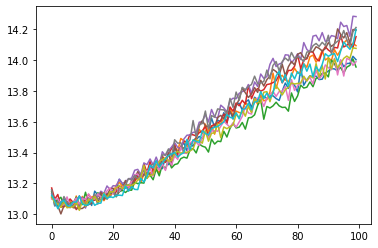

In [24]:
for s in single_snap:
    plt.plot(s)

In [30]:
preds_snap_f[0].shape

(100, 23000, 14)

In [31]:
results_f = []

for i in range(10):
    
    add_snap = [evaluate_ensemble(preds_snap_f[i][:e+1], y_test) for e in range(100)]
    
    results_f.append(add_snap)

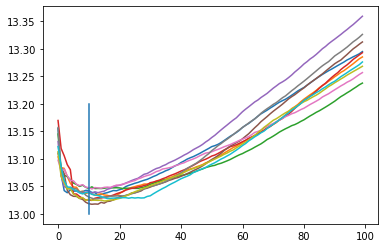

In [39]:
for r in results_f:
    plt.plot(r)

plt.plot([10, 10], [13, 13.2])

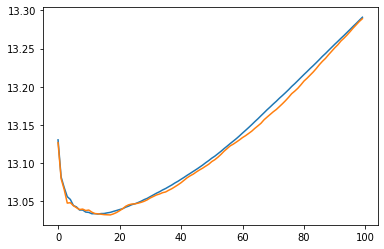

In [44]:
plt.plot([np.mean(r) for r in zip(*results_f)])
plt.plot([np.median(r) for r in zip(*results_f)])

In [48]:
np.argmin([np.mean(r) + np.median(r) for r in zip(*results_f)])

15

In [60]:
def change_shape(ind):
    a = np.array(preds_snap_f)[ind, :15, ...]
    return a.reshape((-1, a.shape[-2], a.shape[-1]))

In [64]:
i1 = np.random.permutation(10)
i2 = np.random.permutation(10)
i3 = np.random.permutation(10)
i4 = np.random.permutation(10)
i5 = np.random.permutation(10)

results_f_cold_ensembles_1 = []
results_f_cold_ensembles_2 = []
results_f_cold_ensembles_3 = []
results_f_cold_ensembles_4 = []
results_f_cold_ensembles_5 = []

for i in range(1, 11):

    results_f_cold_ensembles_1.append(evaluate_ensemble(change_shape(i1[:i]), y_test))
    results_f_cold_ensembles_2.append(evaluate_ensemble(change_shape(i2[:i]), y_test))
    results_f_cold_ensembles_3.append(evaluate_ensemble(change_shape(i3[:i]), y_test))
    results_f_cold_ensembles_4.append(evaluate_ensemble(change_shape(i4[:i]), y_test))
    results_f_cold_ensembles_5.append(evaluate_ensemble(change_shape(i5[:i]), y_test))

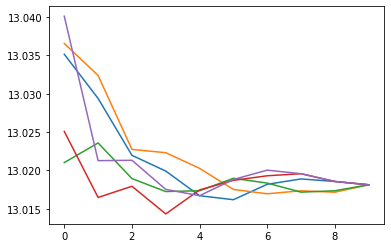

In [68]:
plt.plot(results_f_cold_ensembles_1)
plt.plot(results_f_cold_ensembles_2)
plt.plot(results_f_cold_ensembles_3)s
plt.plot(results_f_cold_ensembles_4)
plt.plot(results_f_cold_ensembles_5)

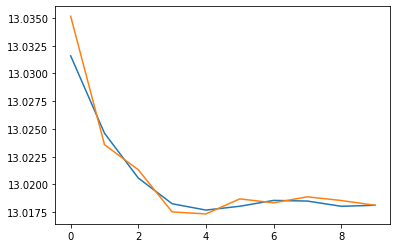

In [69]:
tmp = [results_f_cold_ensembles_1,
       results_f_cold_ensembles_2,
       results_f_cold_ensembles_3,
       results_f_cold_ensembles_4,
       results_f_cold_ensembles_5]

plt.plot([np.mean(r) for r in zip(*tmp)])
plt.plot([np.median(r) for r in zip(*tmp)])

In [76]:
import importlib
import utils
importlib.reload(utils)

<module 'utils' from '../utils/__init__.py'>

In [12]:
def run_snapshot(snap_dir='/tmp/snapshot/snap/', s=20, num=15, cold_rr=4):
    
    for run in range(cold_rr):
    
        for i in range(num):

            run_dir = snap_dir + '__' + str(i)

            if not os.path.isdir(run_dir):
                os.makedirs(run_dir)

            model = networks.convolutional_ae_4_layer(hparams, ['mse', 'mae'])

        callbacks = [utils.callbacks.SnapshotWithAveraging(snap_dir, len(train_set)//batch_size+1, n_cycles=num,
                                                           steps_to_average=s, max_epochs=num+5, cold_start_id=run)]

        model.fit(train_set, epochs=num+5, steps_per_epoch=len(train_set)//batch_size+1,
              validation_steps=len(test_set)//batch_size+1, validation_data=test_set,
              callbacks=callbacks)

In [ ]:
th_dirs = ['/tmp/snapshot/threshold_{}/'.format(i) for i in range(10)]

steps = [5, 10, 20, 50, 100, 200]

for th_dir in th_dirs:
    print('Global run', th_dir)
    for s in steps:
        run_dir = th_dir + '{}/'.format(s)
        run_snapshot(run_dir, s=s)

Global run /tmp/snapshot/threshold_0/
Train for 690 steps, validate for 230 steps
Epoch 1/20
690/690 [==============================] - 10s 14ms/step - loss: 387.1831 - mse: 30060435456.0000 - mae: 387.1829 - val_loss: 0.3637 - val_mse: 1259.2964 - val_mae: 0.3637
Epoch 2/20
690/690 [==============================] - 7s 10ms/step - loss: 0.3613 - mse: 1021.0028 - mae: 0.3613 - val_loss: 0.3613 - val_mse: 1259.2711 - val_mae: 0.3613
Epoch 3/20
690/690 [==============================] - 7s 10ms/step - loss: 290.5355 - mse: 25050365952.0000 - mae: 290.5357 - val_loss: 0.3608 - val_mse: 1259.2683 - val_mae: 0.3608
Epoch 4/20
690/690 [==============================] - 7s 10ms/step - loss: 0.2993 - mse: 693.7349 - mae: 0.2993 - val_loss: 0.3604 - val_mse: 1259.2648 - val_mae: 0.3604
Epoch 5/20
690/690 [==============================] - 7s 10ms/step - loss: 290.4623 - mse: 25050363904.0000 - mae: 290.4625 - val_loss: 0.3601 - val_mse: 1259.2644 - val_mae: 0.3601
Epoch 6/20
690/690 [==========

690/690 [==============================] - 8s 12ms/step - loss: 193.8392 - mse: 20040294400.0000 - mae: 193.8392 - val_loss: 0.3633 - val_mse: 1259.2689 - val_mae: 0.3633
Epoch 2/20
690/690 [==============================] - 7s 10ms/step - loss: 0.3205 - mse: 870.3157 - mae: 0.3205 - val_loss: 0.3616 - val_mse: 1259.2644 - val_mae: 0.3616
Epoch 3/20
690/690 [==============================] - 7s 10ms/step - loss: 0.3719 - mse: 1236.5627 - mae: 0.3719 - val_loss: 0.3608 - val_mse: 1259.2648 - val_mae: 0.3608
Epoch 4/20
690/690 [==============================] - 7s 10ms/step - loss: 387.1440 - mse: 30060435456.0000 - mae: 387.1438 - val_loss: 0.3603 - val_mse: 1259.2616 - val_mae: 0.3603
Epoch 5/20
690/690 [==============================] - 7s 10ms/step - loss: 0.3497 - mse: 873.1834 - mae: 0.3497 - val_loss: 0.3623 - val_mse: 1263.2471 - val_mae: 0.3623
Epoch 6/20
690/690 [==============================] - 7s 10ms/step - loss: 387.2550 - mse: 30060439552.0000 - mae: 387.2552 - val_loss: 

Epoch 2/20
690/690 [==============================] - 7s 10ms/step - loss: 0.4406 - mse: 1307.7612 - mae: 0.4406 - val_loss: 0.3615 - val_mse: 1259.2638 - val_mae: 0.3615
Epoch 3/20
690/690 [==============================] - 7s 10ms/step - loss: 0.2861 - mse: 682.8022 - mae: 0.2861 - val_loss: 0.3609 - val_mse: 1259.2655 - val_mae: 0.3609
Epoch 4/20
690/690 [==============================] - 7s 10ms/step - loss: 193.8618 - mse: 20040290304.0000 - mae: 193.8619 - val_loss: 0.3604 - val_mse: 1259.2622 - val_mae: 0.3604
Epoch 5/20
690/690 [==============================] - 7s 10ms/step - loss: 0.3525 - mse: 847.9840 - mae: 0.3525 - val_loss: 0.3600 - val_mse: 1259.2649 - val_mae: 0.3600
Epoch 6/20
690/690 [==============================] - 7s 10ms/step - loss: 483.9031 - mse: 35070509056.0000 - mae: 483.9034 - val_loss: 0.3598 - val_mse: 1259.2637 - val_mae: 0.3598
Epoch 7/20
690/690 [==============================] - 7s 10ms/step - loss: 290.4715 - mse: 25050363904.0000 - mae: 290.4714 -

Epoch 3/20
690/690 [==============================] - 7s 11ms/step - loss: 0.3421 - mse: 994.2018 - mae: 0.3421 - val_loss: 0.3607 - val_mse: 1259.2637 - val_mae: 0.3607
Epoch 4/20
690/690 [==============================] - 7s 10ms/step - loss: 483.8430 - mse: 35070509056.0000 - mae: 483.8433 - val_loss: 0.3604 - val_mse: 1259.2659 - val_mae: 0.3604
Epoch 5/20
690/690 [==============================] - 7s 10ms/step - loss: 677.2651 - mse: 45090652160.0000 - mae: 677.2654 - val_loss: 0.3601 - val_mse: 1259.2631 - val_mae: 0.3601
Epoch 6/20
690/690 [==============================] - 7s 10ms/step - loss: 0.3588 - mse: 911.4478 - mae: 0.3588 - val_loss: 0.3599 - val_mse: 1259.2646 - val_mae: 0.3599
Epoch 7/20
690/690 [==============================] - 7s 10ms/step - loss: 387.2174 - mse: 30060435456.0000 - mae: 387.2172 - val_loss: 0.3596 - val_mse: 1259.2653 - val_mae: 0.3596
Epoch 8/20
690/690 [==============================] - 7s 10ms/step - loss: 0.3231 - mse: 797.2960 - mae: 0.3231 - 

690/690 [==============================] - 7s 10ms/step - loss: 387.2271 - mse: 30060435456.0000 - mae: 387.2267 - val_loss: 0.3608 - val_mse: 1259.2656 - val_mae: 0.3608
Epoch 4/20
690/690 [==============================] - 7s 10ms/step - loss: 0.3532 - mse: 908.9084 - mae: 0.3532 - val_loss: 0.3604 - val_mse: 1259.2646 - val_mae: 0.3604
Epoch 5/20
690/690 [==============================] - 8s 11ms/step - loss: 290.5162 - mse: 25050363904.0000 - mae: 290.5159 - val_loss: 0.3601 - val_mse: 1259.2656 - val_mae: 0.3601
Epoch 6/20
690/690 [==============================] - 7s 11ms/step - loss: 0.3700 - mse: 849.9272 - mae: 0.3700 - val_loss: 0.3600 - val_mse: 1259.2609 - val_mae: 0.3600
Epoch 7/20
690/690 [==============================] - 7s 11ms/step - loss: 290.4512 - mse: 25050365952.0000 - mae: 290.4510 - val_loss: 0.3597 - val_mse: 1259.2648 - val_mae: 0.3597
Epoch 8/20
690/690 [==============================] - 8s 11ms/step - loss: 0.3548 - mse: 1083.0823 - mae: 0.3548 - val_loss: 

690/690 [==============================] - 7s 10ms/step - loss: 290.4690 - mse: 25050365952.0000 - mae: 290.4690 - val_loss: 0.3608 - val_mse: 1259.2644 - val_mae: 0.3608
Epoch 4/20
690/690 [==============================] - 7s 10ms/step - loss: 0.3042 - mse: 807.1761 - mae: 0.3042 - val_loss: 0.3604 - val_mse: 1259.2650 - val_mae: 0.3604
Epoch 5/20
690/690 [==============================] - 7s 11ms/step - loss: 0.3640 - mse: 1104.6056 - mae: 0.3640 - val_loss: 0.3600 - val_mse: 1259.2637 - val_mae: 0.3600
Epoch 6/20
690/690 [==============================] - 7s 10ms/step - loss: 387.2013 - mse: 30060435456.0000 - mae: 387.2012 - val_loss: 0.3599 - val_mse: 1259.2644 - val_mae: 0.3599
Epoch 7/20
690/690 [==============================] - 7s 10ms/step - loss: 0.3781 - mse: 1068.7068 - mae: 0.3781 - val_loss: 0.3597 - val_mse: 1259.2604 - val_mae: 0.3597
Epoch 8/20
690/690 [==============================] - 7s 11ms/step - loss: 677.2762 - mse: 45090652160.0000 - mae: 677.2766 - val_loss:

Epoch 4/20
690/690 [==============================] - 8s 11ms/step - loss: 0.3731 - mse: 992.0345 - mae: 0.3731 - val_loss: 0.3603 - val_mse: 1259.2640 - val_mae: 0.3603
Epoch 5/20
690/690 [==============================] - 8s 11ms/step - loss: 0.2980 - mse: 858.8839 - mae: 0.2980 - val_loss: 0.3600 - val_mse: 1259.2637 - val_mae: 0.3600
Epoch 6/20
690/690 [==============================] - 8s 11ms/step - loss: 483.9387 - mse: 35070509056.0000 - mae: 483.9388 - val_loss: 0.3598 - val_mse: 1259.2617 - val_mae: 0.3598
Epoch 7/20
690/690 [==============================] - 8s 11ms/step - loss: 0.3521 - mse: 974.2343 - mae: 0.3521 - val_loss: 0.3597 - val_mse: 1259.2625 - val_mae: 0.3597
Epoch 8/20
690/690 [==============================] - 8s 12ms/step - loss: 387.1253 - mse: 30060439552.0000 - mae: 387.1252 - val_loss: 0.3595 - val_mse: 1259.2605 - val_mae: 0.3595
Epoch 9/20
690/690 [==============================] - 8s 12ms/step - loss: 290.4370 - mse: 25050365952.0000 - mae: 290.4371 - 

Epoch 5/20
690/690 [==============================] - 9s 13ms/step - loss: 0.3972 - mse: 1205.7855 - mae: 0.3972 - val_loss: 0.3600 - val_mse: 1259.2618 - val_mae: 0.3600
Epoch 6/20
690/690 [==============================] - 8s 12ms/step - loss: 483.8788 - mse: 35070509056.0000 - mae: 483.8791 - val_loss: 0.3598 - val_mse: 1259.2631 - val_mae: 0.3598
Epoch 7/20
690/690 [==============================] - 9s 13ms/step - loss: 0.3077 - mse: 751.7567 - mae: 0.3077 - val_loss: 0.3595 - val_mse: 1259.2618 - val_mae: 0.3595
Epoch 8/20
690/690 [==============================] - 9s 13ms/step - loss: 580.6082 - mse: 40080580608.0000 - mae: 580.6088 - val_loss: 0.3594 - val_mse: 1259.2632 - val_mae: 0.3594
Epoch 9/20
690/690 [==============================] - 9s 13ms/step - loss: 387.2814 - mse: 30060439552.0000 - mae: 387.2813 - val_loss: 0.3592 - val_mse: 1259.2616 - val_mae: 0.3592
Epoch 10/20
690/690 [==============================] - 9s 12ms/step - loss: 0.2821 - mse: 675.2626 - mae: 0.2821 

690/690 [==============================] - 7s 10ms/step - loss: 0.3207 - mse: 823.5790 - mae: 0.3207 - val_loss: 0.3602 - val_mse: 1259.2650 - val_mae: 0.3602
Epoch 6/20
690/690 [==============================] - 7s 10ms/step - loss: 387.1932 - mse: 30060435456.0000 - mae: 387.1932 - val_loss: 0.3598 - val_mse: 1259.2631 - val_mae: 0.3598
Epoch 7/20
690/690 [==============================] - 7s 10ms/step - loss: 580.5529 - mse: 40080580608.0000 - mae: 580.5530 - val_loss: 0.3596 - val_mse: 1259.2614 - val_mae: 0.3596
Epoch 8/20
690/690 [==============================] - 7s 10ms/step - loss: 0.3660 - mse: 1007.4821 - mae: 0.3660 - val_loss: 0.3595 - val_mse: 1259.2645 - val_mae: 0.3595
Epoch 9/20
690/690 [==============================] - 7s 10ms/step - loss: 0.3721 - mse: 985.3521 - mae: 0.3721 - val_loss: 0.3593 - val_mse: 1259.2629 - val_mae: 0.3593
Epoch 10/20
690/690 [==============================] - 7s 10ms/step - loss: 387.2040 - mse: 30060435456.0000 - mae: 387.2039 - val_loss:

Epoch 6/20
690/690 [==============================] - 7s 10ms/step - loss: 290.4730 - mse: 25050363904.0000 - mae: 290.4731 - val_loss: 0.3597 - val_mse: 1259.2629 - val_mae: 0.3597
Epoch 7/20
690/690 [==============================] - 7s 10ms/step - loss: 387.1665 - mse: 30060435456.0000 - mae: 387.1664 - val_loss: 0.3595 - val_mse: 1259.2631 - val_mae: 0.3595
Epoch 8/20
690/690 [==============================] - 7s 10ms/step - loss: 0.3163 - mse: 790.9072 - mae: 0.3163 - val_loss: 0.3593 - val_mse: 1259.2650 - val_mae: 0.3593
Epoch 9/20
690/690 [==============================] - 7s 10ms/step - loss: 0.4385 - mse: 1244.1963 - mae: 0.4385 - val_loss: 0.3592 - val_mse: 1259.2648 - val_mae: 0.3592
Epoch 10/20
690/690 [==============================] - 7s 10ms/step - loss: 290.4511 - mse: 25050363904.0000 - mae: 290.4511 - val_loss: 0.3591 - val_mse: 1259.2648 - val_mae: 0.3591
Epoch 11/20
690/690 [==============================] - 7s 10ms/step - loss: 0.3849 - mse: 1209.7386 - mae: 0.384

690/690 [==============================] - 7s 10ms/step - loss: 0.3628 - mse: 1026.1942 - mae: 0.3628 - val_loss: 0.3598 - val_mse: 1259.2631 - val_mae: 0.3598
Epoch 7/20
690/690 [==============================] - 7s 10ms/step - loss: 483.8918 - mse: 35070509056.0000 - mae: 483.8916 - val_loss: 0.3597 - val_mse: 1259.2631 - val_mae: 0.3597
Epoch 8/20
690/690 [==============================] - 7s 10ms/step - loss: 0.3632 - mse: 1005.3583 - mae: 0.3632 - val_loss: 0.3594 - val_mse: 1259.2633 - val_mae: 0.3594
Epoch 9/20
690/690 [==============================] - 7s 10ms/step - loss: 774.0108 - mse: 50100727808.0000 - mae: 774.0106 - val_loss: 0.3593 - val_mse: 1259.2643 - val_mae: 0.3593
Epoch 10/20
690/690 [==============================] - 7s 10ms/step - loss: 0.3530 - mse: 962.2106 - mae: 0.3530 - val_loss: 0.3591 - val_mse: 1259.2614 - val_mae: 0.3591
Epoch 11/20
690/690 [==============================] - 7s 10ms/step - loss: 580.6099 - mse: 40080580608.0000 - mae: 580.6102 - val_los

Epoch 7/20
690/690 [==============================] - 7s 11ms/step - loss: 193.8021 - mse: 20040294400.0000 - mae: 193.8021 - val_loss: 0.3596 - val_mse: 1259.2639 - val_mae: 0.3596
Epoch 8/20
690/690 [==============================] - 7s 10ms/step - loss: 0.3150 - mse: 759.4687 - mae: 0.3150 - val_loss: 0.3594 - val_mse: 1259.2604 - val_mae: 0.3594
Epoch 9/20
690/690 [==============================] - 7s 10ms/step - loss: 387.1947 - mse: 30060439552.0000 - mae: 387.1949 - val_loss: 0.3593 - val_mse: 1259.2628 - val_mae: 0.3593
Epoch 10/20
690/690 [==============================] - 7s 10ms/step - loss: 0.3257 - mse: 824.7774 - mae: 0.3257 - val_loss: 0.3591 - val_mse: 1259.2644 - val_mae: 0.3591
Epoch 11/20
690/690 [==============================] - 7s 10ms/step - loss: 0.3392 - mse: 924.4887 - mae: 0.3392 - val_loss: 0.3590 - val_mse: 1259.2617 - val_mae: 0.3590
Epoch 12/20
690/690 [==============================] - 7s 10ms/step - loss: 387.1681 - mse: 30060435456.0000 - mae: 387.1681

Epoch 8/20
690/690 [==============================] - 7s 11ms/step - loss: 0.3638 - mse: 962.4695 - mae: 0.3638 - val_loss: 0.3593 - val_mse: 1259.2616 - val_mae: 0.3593
Epoch 9/20
690/690 [==============================] - 7s 10ms/step - loss: 0.4062 - mse: 1194.1066 - mae: 0.4062 - val_loss: 0.3592 - val_mse: 1259.2631 - val_mae: 0.3592
Epoch 10/20
690/690 [==============================] - 8s 11ms/step - loss: 387.1729 - mse: 30060435456.0000 - mae: 387.1728 - val_loss: 0.3590 - val_mse: 1259.2618 - val_mae: 0.3590
Epoch 11/20
690/690 [==============================] - 7s 11ms/step - loss: 0.4258 - mse: 1337.4233 - mae: 0.4258 - val_loss: 0.3589 - val_mse: 1259.2648 - val_mae: 0.3589
Epoch 12/20
690/690 [==============================] - 8s 11ms/step - loss: 290.3803 - mse: 25050363904.0000 - mae: 290.3804 - val_loss: 0.3588 - val_mse: 1259.2610 - val_mae: 0.3588
Epoch 13/20
690/690 [==============================] - 7s 10ms/step - loss: 193.6636 - mse: 20040290304.0000 - mae: 193.6

Epoch 9/20
690/690 [==============================] - 7s 10ms/step - loss: 483.8935 - mse: 35070509056.0000 - mae: 483.8935 - val_loss: 0.3593 - val_mse: 1259.2646 - val_mae: 0.3593
Epoch 10/20
690/690 [==============================] - 7s 10ms/step - loss: 0.3732 - mse: 968.5009 - mae: 0.3732 - val_loss: 0.3592 - val_mse: 1259.2618 - val_mae: 0.3592
Epoch 11/20
690/690 [==============================] - 7s 11ms/step - loss: 580.5734 - mse: 40080580608.0000 - mae: 580.5734 - val_loss: 0.3590 - val_mse: 1259.2650 - val_mae: 0.3590
Epoch 12/20
690/690 [==============================] - 8s 11ms/step - loss: 0.4445 - mse: 1477.8339 - mae: 0.4445 - val_loss: 0.3589 - val_mse: 1259.2653 - val_mae: 0.3589
Epoch 13/20
690/690 [==============================] - 7s 10ms/step - loss: 0.4310 - mse: 1273.2590 - mae: 0.4310 - val_loss: 0.3589 - val_mse: 1259.2616 - val_mae: 0.3589
Epoch 14/20
690/690 [==============================] - 7s 11ms/step - loss: 387.1220 - mse: 30060439552.0000 - mae: 387.

690/690 [==============================] - 8s 12ms/step - loss: 387.1130 - mse: 30060439552.0000 - mae: 387.1132 - val_loss: 0.3593 - val_mse: 1259.2590 - val_mae: 0.3593
Epoch 10/20
690/690 [==============================] - 8s 12ms/step - loss: 0.4762 - mse: 1484.1149 - mae: 0.4762 - val_loss: 0.3591 - val_mse: 1259.2607 - val_mae: 0.3591
Epoch 11/20
690/690 [==============================] - 8s 12ms/step - loss: 193.8224 - mse: 20040292352.0000 - mae: 193.8223 - val_loss: 0.3590 - val_mse: 1259.2635 - val_mae: 0.3590
Epoch 12/20
690/690 [==============================] - 8s 12ms/step - loss: 0.3092 - mse: 630.9131 - mae: 0.3092 - val_loss: 0.3589 - val_mse: 1259.2621 - val_mae: 0.3589
Epoch 13/20
690/690 [==============================] - 8s 11ms/step - loss: 483.8592 - mse: 35070509056.0000 - mae: 483.8586 - val_loss: 0.3587 - val_mse: 1259.2601 - val_mae: 0.3587
Epoch 14/20
690/690 [==============================] - 8s 12ms/step - loss: 0.3457 - mse: 1034.3115 - mae: 0.3457 - val_

Epoch 10/20
690/690 [==============================] - 9s 13ms/step - loss: 290.4545 - mse: 25050363904.0000 - mae: 290.4543 - val_loss: 0.3591 - val_mse: 1259.2625 - val_mae: 0.3591
Epoch 11/20
690/690 [==============================] - 8s 12ms/step - loss: 0.3475 - mse: 870.0298 - mae: 0.3475 - val_loss: 0.3590 - val_mse: 1259.2637 - val_mae: 0.3590
Epoch 12/20
690/690 [==============================] - 9s 13ms/step - loss: 387.2352 - mse: 30060435456.0000 - mae: 387.2354 - val_loss: 0.3589 - val_mse: 1259.2623 - val_mae: 0.3589
Epoch 13/20
690/690 [==============================] - 9s 13ms/step - loss: 0.3913 - mse: 1112.2875 - mae: 0.3913 - val_loss: 0.3587 - val_mse: 1259.2590 - val_mae: 0.3587
Epoch 14/20
690/690 [==============================] - 8s 12ms/step - loss: 483.8807 - mse: 35070509056.0000 - mae: 483.8807 - val_loss: 0.3586 - val_mse: 1259.2635 - val_mae: 0.3586
Epoch 15/20
690/690 [==============================] - 9s 13ms/step - loss: 387.2134 - mse: 30060439552.0000

690/690 [==============================] - 7s 10ms/step - loss: 483.9108 - mse: 35070513152.0000 - mae: 483.9107 - val_loss: 0.3592 - val_mse: 1259.2632 - val_mae: 0.3592
Epoch 11/20
690/690 [==============================] - 7s 10ms/step - loss: 0.3736 - mse: 968.8144 - mae: 0.3736 - val_loss: 0.3591 - val_mse: 1259.2644 - val_mae: 0.3591
Epoch 12/20
690/690 [==============================] - 7s 10ms/step - loss: 387.1249 - mse: 30060435456.0000 - mae: 387.1249 - val_loss: 0.3589 - val_mse: 1259.2639 - val_mae: 0.3589
Epoch 13/20
690/690 [==============================] - 7s 9ms/step - loss: 387.1497 - mse: 30060439552.0000 - mae: 387.1500 - val_loss: 0.3588 - val_mse: 1259.2629 - val_mae: 0.3588
Epoch 14/20
690/690 [==============================] - 7s 10ms/step - loss: 0.3882 - mse: 1094.1995 - mae: 0.3882 - val_loss: 0.3587 - val_mse: 1259.2606 - val_mae: 0.3587
Epoch 15/20
690/690 [==============================] - 7s 10ms/step - loss: 0.4248 - mse: 1274.4468 - mae: 0.4248 - val_l

Epoch 11/20
690/690 [==============================] - 7s 10ms/step - loss: 580.5520 - mse: 40080580608.0000 - mae: 580.5519 - val_loss: 0.3591 - val_mse: 1259.2646 - val_mae: 0.3591
Epoch 12/20
690/690 [==============================] - 7s 11ms/step - loss: 0.3133 - mse: 800.9128 - mae: 0.3133 - val_loss: 0.3590 - val_mse: 1259.2614 - val_mae: 0.3590
Epoch 13/20
690/690 [==============================] - 7s 10ms/step - loss: 387.2064 - mse: 30060439552.0000 - mae: 387.2067 - val_loss: 0.3588 - val_mse: 1259.2618 - val_mae: 0.3588
Epoch 14/20
690/690 [==============================] - 7s 10ms/step - loss: 0.3724 - mse: 877.5876 - mae: 0.3724 - val_loss: 0.3587 - val_mse: 1259.2635 - val_mae: 0.3587
Epoch 15/20
690/690 [==============================] - 7s 10ms/step - loss: 387.1980 - mse: 30060435456.0000 - mae: 387.1980 - val_loss: 0.3586 - val_mse: 1259.2631 - val_mae: 0.3586
Train for 690 steps, validate for 230 steps
Epoch 1/20
690/690 [==============================] - 8s 12ms/ste

Epoch 12/20
690/690 [==============================] - 7s 10ms/step - loss: 290.4177 - mse: 25050365952.0000 - mae: 290.4175 - val_loss: 0.3590 - val_mse: 1259.2640 - val_mae: 0.3590
Epoch 13/20
690/690 [==============================] - 7s 10ms/step - loss: 0.3201 - mse: 842.7711 - mae: 0.3201 - val_loss: 0.3590 - val_mse: 1259.2655 - val_mae: 0.3590
Epoch 14/20
690/690 [==============================] - 7s 10ms/step - loss: 483.9053 - mse: 35070513152.0000 - mae: 483.9052 - val_loss: 0.3588 - val_mse: 1259.2635 - val_mae: 0.3588
Epoch 15/20
690/690 [==============================] - 7s 10ms/step - loss: 0.4712 - mse: 1457.2535 - mae: 0.4712 - val_loss: 0.3587 - val_mse: 1259.2638 - val_mae: 0.3587
Train for 690 steps, validate for 230 steps
Epoch 1/20
690/690 [==============================] - 8s 12ms/step - loss: 0.3683 - mse: 901.4932 - mae: 0.3683 - val_loss: 0.3655 - val_mse: 1259.2855 - val_mae: 0.3655
Epoch 2/20
690/690 [==============================] - 7s 10ms/step - loss: 38

690/690 [==============================] - 7s 10ms/step - loss: 387.2357 - mse: 30060435456.0000 - mae: 387.2357 - val_loss: 0.3590 - val_mse: 1259.2642 - val_mae: 0.3590
Epoch 13/20
690/690 [==============================] - 7s 10ms/step - loss: 0.3053 - mse: 752.7278 - mae: 0.3053 - val_loss: 0.3588 - val_mse: 1259.2618 - val_mae: 0.3588
Epoch 14/20
690/690 [==============================] - 7s 10ms/step - loss: 193.8301 - mse: 20040292352.0000 - mae: 193.8302 - val_loss: 0.3588 - val_mse: 1259.2633 - val_mae: 0.3588
Epoch 15/20
690/690 [==============================] - 7s 10ms/step - loss: 0.3284 - mse: 938.5959 - mae: 0.3284 - val_loss: 0.3587 - val_mse: 1259.2639 - val_mae: 0.3587
Train for 690 steps, validate for 230 steps
Epoch 1/20
690/690 [==============================] - 8s 12ms/step - loss: 483.9069 - mse: 35070509056.0000 - mae: 483.9079 - val_loss: 0.3702 - val_mse: 1259.2670 - val_mae: 0.3702
Epoch 2/20
690/690 [==============================] - 7s 10ms/step - loss: 0.3

Epoch 13/20
690/690 [==============================] - 7s 11ms/step - loss: 0.4003 - mse: 1176.3473 - mae: 0.4003 - val_loss: 0.3587 - val_mse: 1259.2638 - val_mae: 0.3587
Epoch 14/20
690/690 [==============================] - 7s 11ms/step - loss: 483.8219 - mse: 35070509056.0000 - mae: 483.8220 - val_loss: 0.3585 - val_mse: 1259.2631 - val_mae: 0.3585
Epoch 15/20
690/690 [==============================] - 7s 11ms/step - loss: 0.2894 - mse: 774.4661 - mae: 0.2894 - val_loss: 0.3585 - val_mse: 1259.2620 - val_mae: 0.3585
Train for 690 steps, validate for 230 steps
Epoch 1/20
690/690 [==============================] - 9s 13ms/step - loss: 290.4995 - mse: 25050363904.0000 - mae: 290.4994 - val_loss: 0.3665 - val_mse: 1259.2769 - val_mae: 0.3665
Epoch 2/20
690/690 [==============================] - 7s 11ms/step - loss: 0.3533 - mse: 989.3565 - mae: 0.3533 - val_loss: 0.3616 - val_mse: 1259.2671 - val_mae: 0.3616
Epoch 3/20
690/690 [==============================] - 7s 11ms/step - loss: 290

Epoch 14/20
690/690 [==============================] - 7s 11ms/step - loss: 387.1851 - mse: 30060435456.0000 - mae: 387.1852 - val_loss: 0.3587 - val_mse: 1259.2612 - val_mae: 0.3587
Epoch 15/20
690/690 [==============================] - 7s 11ms/step - loss: 0.3073 - mse: 799.5588 - mae: 0.3073 - val_loss: 0.3586 - val_mse: 1259.2640 - val_mae: 0.3586
Train for 690 steps, validate for 230 steps
Epoch 1/20
690/690 [==============================] - 9s 13ms/step - loss: 0.4697 - mse: 1385.0004 - mae: 0.4697 - val_loss: 0.3636 - val_mse: 1259.2793 - val_mae: 0.3636
Epoch 2/20
690/690 [==============================] - 8s 11ms/step - loss: 387.0762 - mse: 30060439552.0000 - mae: 387.0763 - val_loss: 0.3614 - val_mse: 1259.2656 - val_mae: 0.3614
Epoch 3/20
690/690 [==============================] - 7s 11ms/step - loss: 0.4147 - mse: 1275.5269 - mae: 0.4147 - val_loss: 0.3609 - val_mse: 1259.2642 - val_mae: 0.3609
Epoch 4/20
690/690 [==============================] - 8s 11ms/step - loss: 387

690/690 [==============================] - 8s 11ms/step - loss: 677.2954 - mse: 45090652160.0000 - mae: 677.2953 - val_loss: 0.3586 - val_mse: 1259.2653 - val_mae: 0.3586
Epoch 15/20
690/690 [==============================] - 8s 11ms/step - loss: 483.8135 - mse: 35070509056.0000 - mae: 483.8129 - val_loss: 0.3586 - val_mse: 1259.2638 - val_mae: 0.3586
Train for 690 steps, validate for 230 steps
Epoch 1/20
690/690 [==============================] - 9s 13ms/step - loss: 580.6489 - mse: 50100727808.0000 - mae: 580.6489 - val_loss: 0.3656 - val_mse: 1259.2778 - val_mae: 0.3656
Epoch 2/20
690/690 [==============================] - 8s 12ms/step - loss: 0.3555 - mse: 982.2005 - mae: 0.3555 - val_loss: 0.3614 - val_mse: 1259.2632 - val_mae: 0.3614
Epoch 3/20
690/690 [==============================] - 8s 11ms/step - loss: 0.4193 - mse: 1152.6494 - mae: 0.4193 - val_loss: 0.3608 - val_mse: 1259.2639 - val_mae: 0.3608
Epoch 4/20
690/690 [==============================] - 8s 12ms/step - loss: 483.

690/690 [==============================] - 9s 13ms/step - loss: 387.2331 - mse: 30060435456.0000 - mae: 387.2332 - val_loss: 0.3587 - val_mse: 1259.2653 - val_mae: 0.3587
Epoch 15/20
690/690 [==============================] - 9s 13ms/step - loss: 290.4479 - mse: 25050365952.0000 - mae: 290.4479 - val_loss: 0.3586 - val_mse: 1259.2637 - val_mae: 0.3586
Train for 690 steps, validate for 230 steps
Epoch 1/20
690/690 [==============================] - 10s 15ms/step - loss: 0.3311 - mse: 811.9411 - mae: 0.3311 - val_loss: 0.3637 - val_mse: 1259.2715 - val_mae: 0.3637
Epoch 2/20
690/690 [==============================] - 9s 13ms/step - loss: 483.9336 - mse: 35070509056.0000 - mae: 483.9341 - val_loss: 0.3615 - val_mse: 1259.2650 - val_mae: 0.3615
Epoch 3/20
690/690 [==============================] - 9s 13ms/step - loss: 0.3839 - mse: 1212.0643 - mae: 0.3839 - val_loss: 0.3610 - val_mse: 1259.2638 - val_mae: 0.3610
Epoch 4/20
690/690 [==============================] - 9s 13ms/step - loss: 290

690/690 [==============================] - 7s 10ms/step - loss: 677.3395 - mse: 45090652160.0000 - mae: 677.3395 - val_loss: 0.3586 - val_mse: 1259.2621 - val_mae: 0.3586
Epoch 15/20
690/690 [==============================] - 7s 10ms/step - loss: 0.3761 - mse: 929.0038 - mae: 0.3761 - val_loss: 0.3586 - val_mse: 1259.2621 - val_mae: 0.3586
Train for 690 steps, validate for 230 steps
Epoch 1/20
690/690 [==============================] - 8s 12ms/step - loss: 580.6112 - mse: 40080580608.0000 - mae: 580.6115 - val_loss: 0.3671 - val_mse: 1259.2760 - val_mae: 0.3671
Epoch 2/20
690/690 [==============================] - 7s 10ms/step - loss: 0.3865 - mse: 1028.4658 - mae: 0.3865 - val_loss: 0.3617 - val_mse: 1259.2656 - val_mae: 0.3617
Epoch 3/20
690/690 [==============================] - 7s 10ms/step - loss: 0.3834 - mse: 1122.8058 - mae: 0.3834 - val_loss: 0.3609 - val_mse: 1259.2644 - val_mae: 0.3609
Epoch 4/20
690/690 [==============================] - 7s 10ms/step - loss: 483.8753 - mse:

Epoch 15/20
690/690 [==============================] - 7s 10ms/step - loss: 290.4561 - mse: 25050365952.0000 - mae: 290.4562 - val_loss: 0.3585 - val_mse: 1259.2631 - val_mae: 0.3585
Train for 690 steps, validate for 230 steps
Epoch 1/20
690/690 [==============================] - 8s 12ms/step - loss: 0.2493 - mse: 407.0320 - mae: 0.2493 - val_loss: 0.3628 - val_mse: 1259.3077 - val_mae: 0.3628
Epoch 2/20
690/690 [==============================] - 7s 10ms/step - loss: 193.8892 - mse: 20040290304.0000 - mae: 193.8892 - val_loss: 0.3615 - val_mse: 1259.2656 - val_mae: 0.3615
Epoch 3/20
690/690 [==============================] - 7s 10ms/step - loss: 0.3582 - mse: 928.4095 - mae: 0.3582 - val_loss: 0.3607 - val_mse: 1259.2633 - val_mae: 0.3607
Epoch 4/20
690/690 [==============================] - 7s 10ms/step - loss: 387.1970 - mse: 30060435456.0000 - mae: 387.1971 - val_loss: 0.3603 - val_mse: 1259.2640 - val_mae: 0.3603
Epoch 5/20
690/690 [==============================] - 7s 10ms/step - 

690/690 [==============================] - 7s 10ms/step - loss: 0.3445 - mse: 1094.6561 - mae: 0.3445 - val_loss: 0.3587 - val_mse: 1259.2612 - val_mae: 0.3587
Train for 690 steps, validate for 230 steps
Epoch 1/20
690/690 [==============================] - 8s 12ms/step - loss: 290.4027 - mse: 25050363904.0000 - mae: 290.4027 - val_loss: 0.3692 - val_mse: 1259.2802 - val_mae: 0.3692
Epoch 2/20
690/690 [==============================] - 7s 10ms/step - loss: 0.4254 - mse: 1341.4877 - mae: 0.4254 - val_loss: 0.3615 - val_mse: 1259.2667 - val_mae: 0.3615
Epoch 3/20
690/690 [==============================] - 7s 10ms/step - loss: 0.4390 - mse: 1377.6298 - mae: 0.4390 - val_loss: 0.3608 - val_mse: 1259.2616 - val_mae: 0.3608
Epoch 4/20
690/690 [==============================] - 7s 10ms/step - loss: 290.3936 - mse: 25050365952.0000 - mae: 290.3935 - val_loss: 0.3603 - val_mse: 1259.2676 - val_mae: 0.3603
Epoch 5/20
690/690 [==============================] - 7s 10ms/step - loss: 290.4684 - mse:

Train for 690 steps, validate for 230 steps
Epoch 1/20
690/690 [==============================] - 8s 12ms/step - loss: 193.9066 - mse: 20040290304.0000 - mae: 193.9065 - val_loss: 0.3664 - val_mse: 1259.3051 - val_mae: 0.3664
Epoch 2/20
690/690 [==============================] - 7s 10ms/step - loss: 0.2876 - mse: 566.3499 - mae: 0.2876 - val_loss: 0.3614 - val_mse: 1259.2684 - val_mae: 0.3614
Epoch 3/20
690/690 [==============================] - 7s 10ms/step - loss: 387.2549 - mse: 30060435456.0000 - mae: 387.2549 - val_loss: 0.3606 - val_mse: 1259.2635 - val_mae: 0.3606
Epoch 4/20
690/690 [==============================] - 7s 10ms/step - loss: 0.3277 - mse: 774.2752 - mae: 0.3277 - val_loss: 0.3602 - val_mse: 1259.2638 - val_mae: 0.3602
Epoch 5/20
690/690 [==============================] - 7s 10ms/step - loss: 0.4547 - mse: 1387.5267 - mae: 0.4547 - val_loss: 0.3599 - val_mse: 1259.2618 - val_mae: 0.3599
Epoch 6/20
690/690 [==============================] - 7s 10ms/step - loss: 193.68

690/690 [==============================] - 9s 13ms/step - loss: 0.4087 - mse: 1247.5597 - mae: 0.4087 - val_loss: 0.3635 - val_mse: 1259.2775 - val_mae: 0.3635
Epoch 2/20
690/690 [==============================] - 9s 13ms/step - loss: 483.8260 - mse: 35070509056.0000 - mae: 483.8266 - val_loss: 0.3614 - val_mse: 1259.2665 - val_mae: 0.3614
Epoch 3/20
690/690 [==============================] - 8s 12ms/step - loss: 0.2934 - mse: 775.2604 - mae: 0.2934 - val_loss: 0.3608 - val_mse: 1259.2626 - val_mae: 0.3608
Epoch 4/20
690/690 [==============================] - 8s 12ms/step - loss: 290.4751 - mse: 25050365952.0000 - mae: 290.4749 - val_loss: 0.3603 - val_mse: 1259.2642 - val_mae: 0.3603
Epoch 5/20
690/690 [==============================] - 9s 12ms/step - loss: 0.3898 - mse: 1065.8260 - mae: 0.3898 - val_loss: 0.3600 - val_mse: 1259.2649 - val_mae: 0.3600
Epoch 6/20
690/690 [==============================] - 9s 13ms/step - loss: 290.4055 - mse: 25050363904.0000 - mae: 290.4056 - val_loss:

Epoch 2/20
690/690 [==============================] - 8s 11ms/step - loss: 483.8774 - mse: 35070513152.0000 - mae: 483.8774 - val_loss: 0.3616 - val_mse: 1259.2582 - val_mae: 0.3616
Epoch 3/20
690/690 [==============================] - 8s 12ms/step - loss: 193.8205 - mse: 20040292352.0000 - mae: 193.8205 - val_loss: 0.3608 - val_mse: 1259.2638 - val_mae: 0.3608
Epoch 4/20
690/690 [==============================] - 8s 11ms/step - loss: 0.3478 - mse: 948.0363 - mae: 0.3478 - val_loss: 0.3604 - val_mse: 1259.2614 - val_mae: 0.3604
Epoch 5/20
690/690 [==============================] - 8s 11ms/step - loss: 387.2247 - mse: 30060439552.0000 - mae: 387.2247 - val_loss: 0.3601 - val_mse: 1259.2637 - val_mae: 0.3601
Epoch 6/20
690/690 [==============================] - 8s 11ms/step - loss: 0.3467 - mse: 817.7523 - mae: 0.3467 - val_loss: 0.3598 - val_mse: 1259.2656 - val_mae: 0.3598
Epoch 7/20
690/690 [==============================] - 8s 11ms/step - loss: 0.3800 - mse: 1103.6720 - mae: 0.3800 -

Epoch 3/20
690/690 [==============================] - 8s 11ms/step - loss: 0.2699 - mse: 647.1606 - mae: 0.2699 - val_loss: 0.3607 - val_mse: 1259.2635 - val_mae: 0.3607
Epoch 4/20
690/690 [==============================] - 8s 11ms/step - loss: 193.8160 - mse: 20040292352.0000 - mae: 193.8161 - val_loss: 0.3603 - val_mse: 1259.2633 - val_mae: 0.3603
Epoch 5/20
690/690 [==============================] - 8s 11ms/step - loss: 0.4444 - mse: 1442.1787 - mae: 0.4444 - val_loss: 0.3600 - val_mse: 1259.2640 - val_mae: 0.3600
Epoch 6/20
690/690 [==============================] - 8s 12ms/step - loss: 387.0398 - mse: 30060435456.0000 - mae: 387.0395 - val_loss: 0.3597 - val_mse: 1259.2639 - val_mae: 0.3597
Epoch 7/20
690/690 [==============================] - 8s 12ms/step - loss: 580.5403 - mse: 40080580608.0000 - mae: 580.5406 - val_loss: 0.3595 - val_mse: 1259.2627 - val_mae: 0.3595
Epoch 8/20
690/690 [==============================] - 8s 11ms/step - loss: 0.3863 - mse: 1149.4390 - mae: 0.3863 

690/690 [==============================] - 9s 13ms/step - loss: 483.9548 - mse: 35070509056.0000 - mae: 483.9547 - val_loss: 0.3608 - val_mse: 1259.2625 - val_mae: 0.3608
Epoch 4/20
368/690 [===============>..............] - ETA: 2s - loss: 0.5223 - mse: 1547.0660 - mae: 0.5223